<a href="https://colab.research.google.com/github/luctiz/Grupo43-TP2/blob/master/TP2_Features_Soledad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install category_encoders

     |████████████████████████████████| 102kB 2.9MB/s 


In [0]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Carga y limpieza de datos

## (Hecho con la info obtenida en el notebook LimpiezaDeDatos)

In [0]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
ejemplo = pd.read_csv("../content/drive/My Drive/data/ejemploRespuesta.csv", names = ["id", "precio"])
test = pd.read_csv("../content/drive/My Drive/data/test.csv", parse_dates = ['fecha'])
train = pd.read_csv("../content/drive/My Drive/data/train.csv",parse_dates = ['fecha'])
#ejemplo =  pd.read_csv('data/ejemploRespuesta.csv', names = ["id", "precio"] )
#test =  pd.read_csv('data/test.csv', parse_dates = ['fecha'])
#train = pd.read_csv('data/train.csv',parse_dates = ['fecha'])

In [0]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
train['metroscubiertos']=train['metroscubiertos'].fillna(round(train['metroscubiertos'].mean()))
test['metroscubiertos']=test['metroscubiertos'].fillna(round(test['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
train['metroscubiertos']=train['metroscubiertos'].astype(np.int16)
test['metroscubiertos']=test['metroscubiertos'].astype(np.int16)

In [0]:
#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
train['metrostotales']=train['metrostotales'].fillna(round(train['metrostotales'].mean()))
test['metrostotales']=test['metrostotales'].fillna(round(test['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
train['metrostotales']=train['metrostotales'].astype(np.int16)
test['metrostotales']=test['metrostotales'].astype(np.int16)

In [0]:
#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
train['habitaciones']=train['habitaciones'].fillna(3)
test['habitaciones']=test['habitaciones'].fillna(3)
#Luego convierto a np.int8
train['habitaciones']=train['habitaciones'].astype(np.int8)
test['habitaciones']=test['habitaciones'].astype(np.int8)

In [0]:
#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
train['antiguedad']=train['antiguedad'].fillna(round(train['antiguedad'].mean()))
test['antiguedad']=test['antiguedad'].fillna(round(train['antiguedad'].mean()))
#Luego convierto a np.uint8
train['antiguedad']=train['antiguedad'].astype(np.uint8)
test['antiguedad']=test['antiguedad'].astype(np.uint8)

In [0]:
#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['garages']=train['garages'].fillna(2)
test['garages']=test['garages'].fillna(2)
#convierto a np.int8
train['garages']=train['garages'].astype(np.int8)
test['garages']=test['garages'].astype(np.int8)

In [0]:
#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['banos']=train['banos'].fillna(2)
test['banos']=test['banos'].fillna(2)
#convierto a np.int8
train['banos']=train['banos'].astype(np.int8)
test['banos']=test['banos'].astype(np.int8)

In [0]:
train['gimnasio']=train['gimnasio'].astype(np.int8)
train['usosmultiples']=train['usosmultiples'].astype(np.int8)
train['piscina']=train['piscina'].astype(np.int8)
train['escuelascercanas']=train['escuelascercanas'].astype(np.int8)
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype(np.int8)
test['gimnasio']=test['gimnasio'].astype(np.int8)
test['usosmultiples']=test['usosmultiples'].astype(np.int8)
test['piscina']=test['piscina'].astype(np.int8)
test['escuelascercanas']=test['escuelascercanas'].astype(np.int8)
test['centroscomercialescercanos']=test['centroscomercialescercanos'].astype(np.int8)

In [0]:
#Creo categoria para los que no tienen categoria en provincia:
train['provincia']=train['provincia'].fillna('N/A')
test['provincia']=test['provincia'].fillna('N/A')
#Creo categoria para los que no tienen categoria en ciudad:
train['ciudad']=train['ciudad'].fillna('N/A')
test['ciudad']=test['ciudad'].fillna('N/A')
#Relleno los nulls en direccion con un - .
train['direccion']=train['direccion'].fillna('-')
test['direccion']=test['direccion'].fillna('-')
#Creo categoria para los que no tienen categoria en tipodepropiedad:
train['tipodepropiedad']=train['tipodepropiedad'].fillna('N/A')
test['tipodepropiedad']=test['tipodepropiedad'].fillna('N/A')

In [0]:
train['titulo']=train['titulo'].fillna(' ')
train['descripcion']=train['descripcion'].fillna(' ')
test['titulo']=test['titulo'].fillna(' ')
test['descripcion']=test['descripcion'].fillna(' ')

In [0]:
train['precio']=train['precio'].astype(np.int32)
train['id']=train['id'].astype(np.int32)
test['id']=test['id'].astype(np.int32)

In [0]:
#Algunas columnas tienen nulls que no se como encararlos. Por ahora los relleno con 0
train=train.fillna(0)
test=test.fillna(0)

# Armado de features:

In [16]:
train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [17]:
test.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos'],
      dtype='object')

## OneHotEncoding para tipodepropiedad

In [0]:
#Voy a usar OneHotEncoder para convertir la columna categorica tipodepropiedad en dummies.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
dummies = enc.fit_transform(train['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies = pd.DataFrame(dummies)
dummies_test = enc.transform(test['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies_test = pd.DataFrame(dummies_test)

In [0]:
dummies.columns=enc.categories_[0].tolist()
dummies=dummies.add_prefix('prop_')
dummies=dummies.astype(np.int8)

dummies_test.columns=enc.categories_[0].tolist()
dummies_test=dummies_test.add_prefix('prop_')
dummies_test=dummies_test.astype(np.int8)

In [20]:
dummies.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
dummies_test.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modelo Random Forest

In [0]:
def crear_submit(model, x_train, y_train, x_test, nombre):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    for i in range(len(result)):
      result[i] = round(result[i],3)
    final = test.loc[:, ['id']]
    final['target'] = result
    ruta = "../content/drive/My Drive/data/submit"+ nombre +".csv"
    final.to_csv(path_or_buf = ruta, index = False )
    df = pd.read_csv(ruta)
    return df

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.ensemble  import RandomForestRegressor

RF_model=RandomForestRegressor()

### MAE score para RF

In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales', 'idzona','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos']
X = train[Numericos].join(dummies)
Y = train['precio']

In [26]:
#Utilizo el modelo que funciona mejor, Random Forest
#RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score1 = -scores.mean()
RF_mae_score1

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

664126.6746905978

In [0]:
def mostrar_importancias(X, Y,model):
    model.fit(X,Y)
    importancias = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['importancia']).reset_index()
    importancias.columns = ['feature', 'importancia']
    plt.figure(figsize = (18,5))
    graf = sns.barplot(x = importancias.feature, y = importancias.importancia, orient = 'v')
    graf.set_ylabel("Importancias", fontsize = 16)
    graf.set_xlabel("Features", fontsize = 19)
    plt.xticks(fontsize = 12, rotation = 'vertical')
    plt.yticks(fontsize = 12)
    graf.set_title("Importancia de Features", fontsize = 21)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


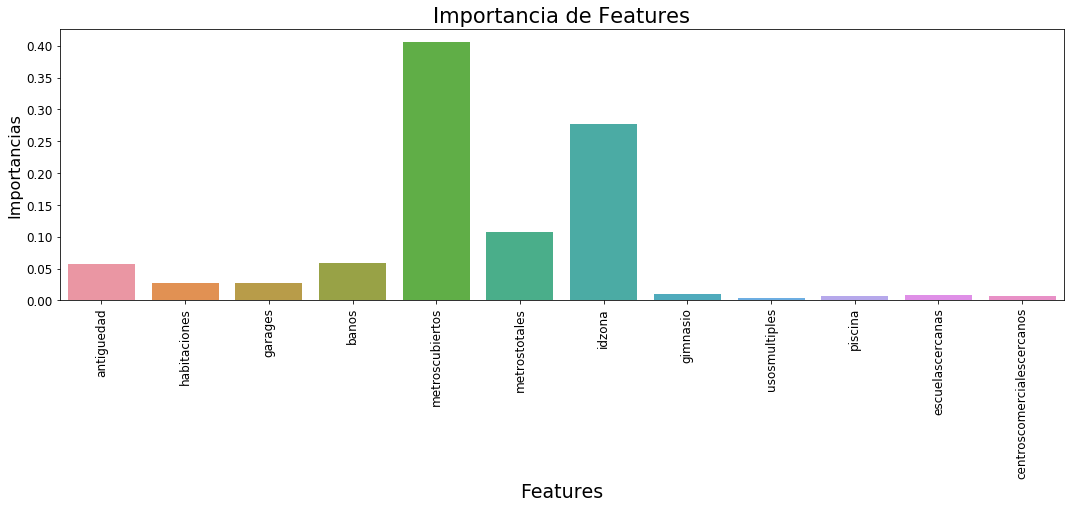

In [30]:
#Veo la importancia de los features númericos
x = train[Numericos]
mostrar_importancias(x,Y,RF_model)

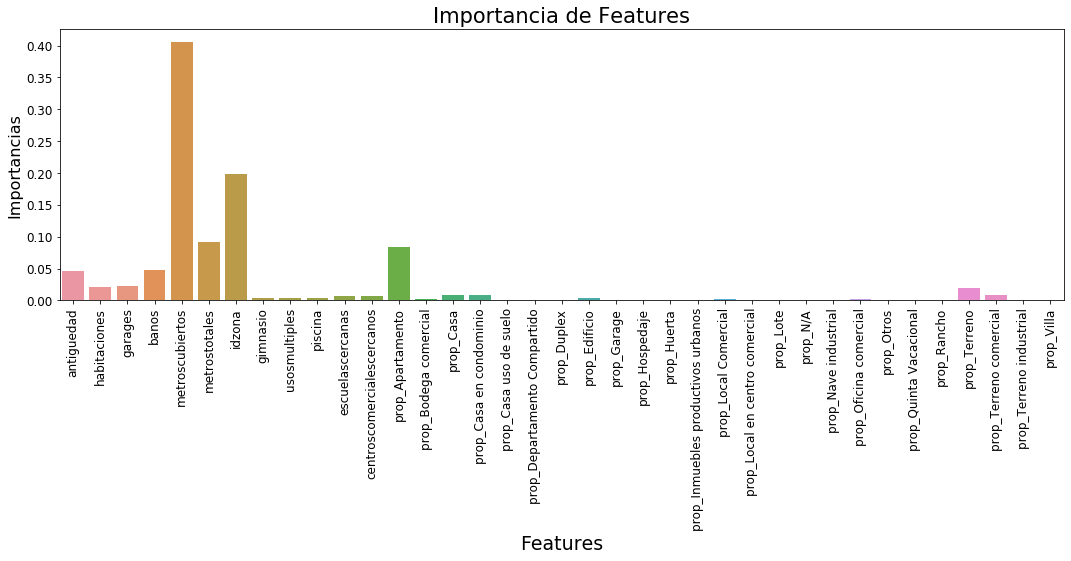

In [31]:
#Veo la importancia de los features con los tipos de propiedad
mostrar_importancias(X,Y,RF_model)

## OneHotEncoding para provincias

In [0]:
#Voy a usar OneHotEncoder para convertir la columna categorica provincia en dummies.
enc_prov = OneHotEncoder()
dummies_prov = enc_prov.fit_transform(train['provincia'].values.reshape(-1, 1)).toarray()
dummies_prov = pd.DataFrame(dummies_prov)

dummies_prov_test = enc_prov.transform(test['provincia'].values.reshape(-1, 1)).toarray()
dummies_prov_test = pd.DataFrame(dummies_prov_test)

dummies_prov.columns=enc_prov.categories_[0].tolist()
dummies_prov=dummies_prov.add_prefix('prov_')
dummies_prov=dummies_prov.astype(np.int8)

dummies_prov_test.columns=enc_prov.categories_[0].tolist()
dummies_prov_test=dummies_prov_test.add_prefix('prov_')
dummies_prov_test=dummies_prov_test.astype(np.int8)


In [33]:
dummies_prov.head()

,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,prov_Edo. de México,prov_Guanajuato,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
dummies_prov_test.head()

,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,prov_Edo. de México,prov_Guanajuato,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Pruebo el modelo

In [0]:
X = X.join(dummies_prov)

In [36]:
#Utilizo el modelo que funciona mejor, Random Forest
#RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score2 = -scores.mean()
RF_mae_score2

638820.760252596

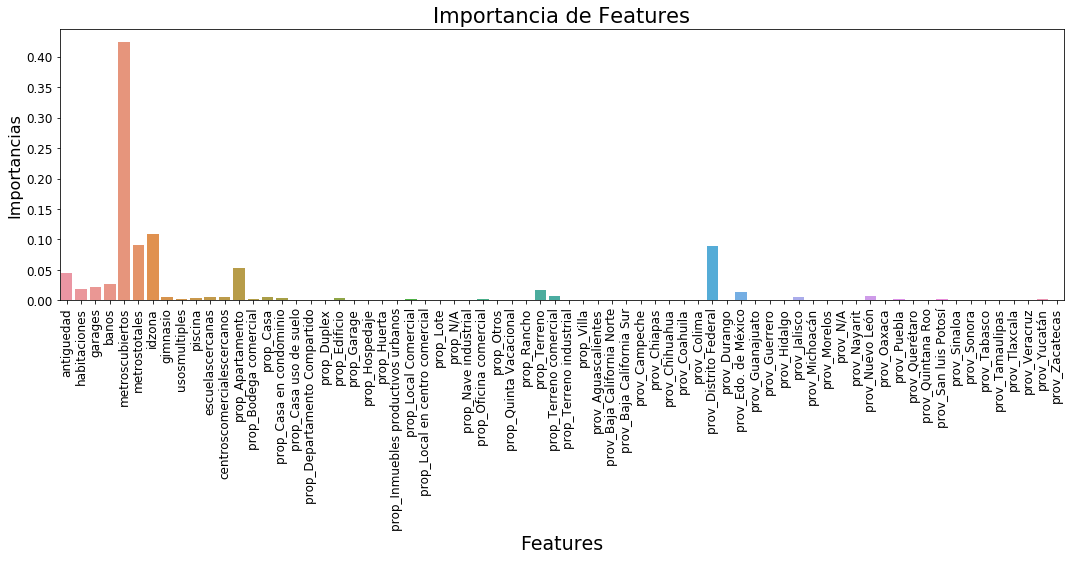

In [37]:
mostrar_importancias(X,Y,RF_model)

## Features sobre el tiempo

En el TP1 vimos como los precios iban en aumento a medida que el tiempo aumentaba, por lo que nos interesa crear nuevos features tomando en cuenta el tiempo en el que se publicaron las propiedades.


Para realizar un nuevo feature comenzaremos añadiendo un peso para cada fecha, este peso irá en aumento a medida que las fechas van subiendo, así simularemos el crecimiento del precio a lo largo del tiempo.

In [0]:
#Califico las fechas de acuerdo a la diferencia entre la fecha actual y la fecha mínima sobre el máximo de dias
fecha_min = train.fecha.min()
fecha_max = train.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
def calificar_fecha(fecha):
    delta = fecha - fecha_min
    return delta.days/delta_max_days

In [39]:
train["puntaje_por_fecha"] = train['fecha'].transform(lambda x: calificar_fecha(x))
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,puntaje_por_fecha
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8,2,1,2,80,80,23533.0,0.000000,0.000000,2015-08-23,0,0,0,0,0,2273000,0.728368
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,2,268,180,24514.0,19.310205,-99.227655,2013-06-28,0,0,0,1,1,3600000,0.297919
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,2,144,166,48551.0,0.000000,0.000000,2015-10-17,0,0,0,0,0,1200000,0.758488
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,1,63,67,53666.0,19.301890,-99.688015,2012-03-09,0,0,0,1,1,650000,0.037240
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,1,95,95,47835.0,0.000000,0.000000,2016-06-07,0,0,0,0,0,1150000,0.886637


In [40]:
#Set de test
fecha_min = test.fecha.min()
fecha_max = test.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
test["puntaje_por_fecha"] = test['fecha'].transform(lambda x: calificar_fecha(x))
test.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29,3,2,4,300,176,0.0,19.408668,-99.246767,2013-07-20,0,0,0,0,0,0.309967
1,51775,departamentos en venta en montebello,<p>departamento una recamara:\n</p><p>departam...,Apartamento,-,Mérida,Yucatán,8,1,1,1,67,67,113851.0,21.032480,-89.592424,2015-10-24,0,0,0,0,0,0.762322
2,115253,departamento nuevo delegación coyoacán de 87 m...,"departamento nuevo de 87.06 m2, 1 cajón de est...",Apartamento,"Pueblo de los Reyes, Coyoacán, Mexico D.F.",Coyoacán,Distrito Federal,0,2,1,2,87,100,23620.0,19.332829,-99.152913,2015-05-30,0,0,0,0,1,0.681818
3,299321,departamento en venta en acapulco,<p> raíces dv001 precioso departamento tipo k...,Apartamento,-,Acapulco de Juárez,Guerrero,2,2,2,2,86,86,129347.0,16.860487,-99.878383,2015-04-02,0,0,0,0,0,0.650055
4,173570,bonita casa sola equipada de dos niveles en lo...,"<p>casa sola, bonita de dos rec&aacute;maras u...",Casa,CEDROS,Tultitlán,Edo. de México,10,2,1,1,80,76,57125.0,19.640482,-99.127273,2013-08-15,0,0,0,1,1,0.324206


# Modelo Random Forest

### MAE score para RF

In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos', 'puntaje_por_fecha']
X = train[Numericos].join(dummies).join(dummies_prov)
Y = train['precio']

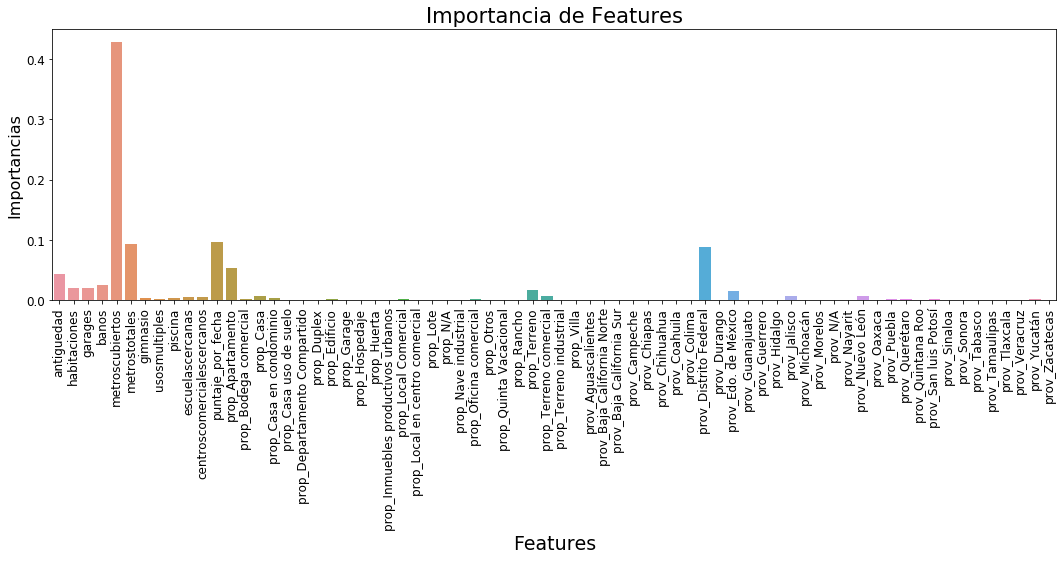

In [42]:
RF_model.fit(X,Y)
mostrar_importancias(X,Y,RF_model)

In [43]:
#Mido el score
#RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score3 = -scores.mean()
RF_mae_score3

686103.2744350208

**Es evidente que este feature funcionó muy bien, pues el escore bajó bastante luego de agregar este feature. Dado que el resultado es bueno este feature se conservará en el set de features definitivo.**

## Veamos ahora qué pasa si normalizo los datos

In [0]:
from sklearn import preprocessing 
def normalizar_data(df):
    min_max_scaler = preprocessing.MinMaxScaler() 
    np_scaled = min_max_scaler.fit_transform(df)
    df_norm = pd.DataFrame(np_scaled)
    df_norm.columns = df.columns
    return df_norm

In [45]:
X_normalized = normalizar_data(X)
X_normalized.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,prov_Edo. de México,prov_Guanajuato,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,0.0,0.728368,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,1.0,0.297919,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,0.0,0.758488,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,1.0,0.037240,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,0.0,0.886637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Vuelvo a evaluar el score con Random Forest y los features normalizados

In [46]:
#Mido el score
RF_model.fit(X_normalized,Y)
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score4 = -scores.mean()
RF_mae_score4

686306.840322909

## Features descripcion

Para el primer TP descubrimos que habia ciertas palabras que estaban correlacionadas a mayor precio y otras a menor precio. Usando esa informacion vamos a armar features que nos digan si la descripcion tiene o no determinada palabra

In [0]:
#Paso todas las descripciones a minúscula para contar las palabras con mas precision
train['descripcion']=train['descripcion'].apply(lambda x: x.lower())

In [0]:
Palabras_mayor_precio=['cuarto','vestidor','terraza','family','vista','bodega',\
                       'salón','estudio','jardín','room','jacuzzi','lujo','antecomedor',\
                       'tv','fiestas','juegos','estacionamiento','gimnasio','nado',\
                       'lugares','doble','desayunador','servicio','chimenea','visita',\
                       'acabado','espacio','salon','alberca','garden','spa']
Palabras_menor_precio=['minutos','acept','boiler','reja','credito','transporte'\
                      ,'cochera','contado','escuela','inf','fovissste','cerca',\
                      'bancario','protecciones','patio','infonavit']
Palabras=Palabras_mayor_precio + Palabras_menor_precio

In [0]:
prueba=train.head(5)

In [0]:
dummies_palabras_descr=pd.DataFrame()
#Por cada palabra en la lista genero una columna que diga si la descripcion contenia esa palabra o no
for palabra in Palabras:
    dummies_palabras_descr[palabra]=train['descripcion'].apply(lambda x: palabra in x).astype(np.int8)
#Renombro estas columnas agregandoles un prefijo
dummies_palabras_descr=dummies_palabras_descr.add_prefix('desc_')

In [51]:
dummies_palabras_descr.head(3)

,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,desc_chimenea,desc_visita,desc_acabado,desc_espacio,desc_salon,desc_alberca,desc_garden,desc_spa,desc_minutos,desc_acept,desc_boiler,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0


In [0]:
dummies_palabras_descr_test=pd.DataFrame()
#Hago lo mismo para el set de test
for palabra in Palabras:
    dummies_palabras_descr_test[palabra]=test['descripcion'].apply(lambda x: palabra in x).astype(np.int8)
dummies_palabras_descr_test=dummies_palabras_descr_test.add_prefix('desc_')

In [53]:
dummies_palabras_descr_test.head()

,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,desc_chimenea,desc_visita,desc_acabado,desc_espacio,desc_salon,desc_alberca,desc_garden,desc_spa,desc_minutos,desc_acept,desc_boiler,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Nuevos features sobre la SVD

Aplico la SVD a los features que tengo hasta el momento, y veo dónde se concentra la energía de la matriz. La idea es crear nuevos features a partir de esta información.

In [0]:
from scipy.linalg import svd
from scipy.sparse.linalg import svds

In [55]:
# Utilizo el set de datos con todos los features creados hasta el momento
data_features = train[Numericos].join(dummies).join(dummies_prov)
#Centro los datos
centered = data_features - data_features.mean()
centered.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,prov_Edo. de México,prov_Guanajuato,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,-0.095042,-0.911471,-0.618175,-0.11795,-94.015558,-96.815508,-0.062475,-0.055092,-0.087383,-0.444142,-0.396533,0.078079,0.761079,-0.005858,-0.590488,-0.080404,-0.00295,-0.000588,-0.001429,-0.005817,-0.000004,-0.000004,-0.000083,-0.000833,-0.012729,-0.000687,-0.000021,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417,-0.007304,-0.013417,-0.007083,-0.001096,-0.004692,-0.019125,-0.015396,-0.0042,0.755042,-0.009479,-0.173363,-0.011917,-0.011158,-0.010504,-0.088492,-0.010296,-0.030571,-0.000646,-0.005633,-0.06385,-0.002962,-0.043421,-0.070783,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392
1,1.904958,0.088529,0.381825,-0.11795,93.984442,3.184492,-0.062475,-0.055092,-0.087383,0.555858,0.603467,-0.352371,-0.238921,-0.005858,-0.590488,0.919596,-0.00295,-0.000588,-0.001429,-0.005817,-0.000004,-0.000004,-0.000083,-0.000833,-0.012729,-0.000687,-0.000021,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417,-0.007304,-0.013417,-0.007083,-0.001096,-0.004692,-0.019125,-0.015396,-0.0042,0.755042,-0.009479,-0.173363,-0.011917,-0.011158,-0.010504,-0.088492,-0.010296,-0.030571,-0.000646,-0.005633,-0.06385,-0.002962,-0.043421,-0.070783,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392
2,-3.095042,0.088529,0.381825,-0.11795,-30.015558,-10.815508,-0.062475,-0.055092,-0.087383,-0.444142,-0.396533,0.108199,-0.238921,-0.005858,0.409512,-0.080404,-0.00295,-0.000588,-0.001429,-0.005817,-0.000004,-0.000004,-0.000083,-0.000833,-0.012729,-0.000687,-0.000021,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417,-0.007304,-0.013417,-0.007083,-0.001096,-0.004692,-0.019125,-0.015396,-0.0042,-0.244958,-0.009479,-0.173363,-0.011917,-0.011158,-0.010504,0.911508,-0.010296,-0.030571,-0.000646,-0.005633,-0.06385,-0.002962,-0.043421,-0.070783,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392
3,-7.095042,-0.911471,-0.618175,-1.11795,-111.015558,-109.815508,-0.062475,-0.055092,-0.087383,0.555858,0.603467,-0.613050,-0.238921,-0.005858,0.409512,-0.080404,-0.00295,-0.000588,-0.001429,-0.005817,-0.000004,-0.000004,-0.000083,-0.000833,-0.012729,-0.000687,-0.000021,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417,-0.007304,-0.013417,-0.007083,-0.001096,-0.004692,-0.019125,-0.015396,-0.0042,-0.244958,-0.009479,0.826638,-0.011917,-0.011158,-0.010504,-0.088492,-0.010296,-0.030571,-0.000646,-0.005633,-0.06385,-0.002962,-0.043421,-0.070783,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392
4,1.904958,-0.911471,-0.618175,-1.11795,-79.015558,-81.815508,-0.062475,-0.055092,-0.087383,-0.444142,-0

In [56]:
centered.shape

(240000, 70)

In [57]:
#hago lo mismo para el set de test
# Utilizo el set de datos con todos los features creados hasta el momento
data_features_test = test[Numericos].join(dummies_test).join(dummies_prov_test)
#Centro los datos
centered_test = data_features_test - data_features_test.mean()
centered_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,prov_Edo. de México,prov_Guanajuato,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,20.87465,0.084017,0.3821,1.885667,126.233567,-0.315817,-0.06365,-0.055533,-0.088267,-0.445967,-0.398767,-0.340717,-0.237183,-0.006,0.40975,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633,-0.00735,-0.01365,-0.007317,-0.000883,-0.004383,-0.019067,-0.014633,-0.004,0.75425,-0.008567,-0.17,-0.011333,-0.011983,-0.010083,-0.088683,-0.011417,-0.030983,-0.0007,-0.006133,-0.066183,-0.003217,-0.041367,-0.072083,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,-0.0337,-0.000533
1,-0.12535,-1.915983,-0.6179,-1.114333,-106.766433,-109.315817,-0.06365,-0.055533,-0.088267,-0.445967,-0.398767,0.111638,0.762817,-0.006,-0.59025,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633,-0.00735,-0.01365,-0.007317,-0.000883,-0.004383,-0.019067,-0.014633,-0.004,-0.24575,-0.008567,-0.17,-0.011333,-0.011983,-0.010083,-0.088683,-0.011417,-0.030983,-0.0007,-0.006133,-0.066183,-0.003217,-0.041367,-0.072083,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,0.9663,-0.000533
2,-8.12535,-0.915983,-0.6179,-0.114333,-86.766433,-76.315817,-0.06365,-0.055533,-0.088267,-0.445967,0.601233,0.031134,0.762817,-0.006,-0.59025,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633,-0.00735,-0.01365,-0.007317,-0.000883,-0.004383,-0.019067,-0.014633,-0.004,0.75425,-0.008567,-0.17,-0.011333,-0.011983,-0.010083,-0.088683,-0.011417,-0.030983,-0.0007,-0.006133,-0.066183,-0.003217,-0.041367,-0.072083,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,-0.0337,-0.000533
3,-6.12535,-0.915983,0.3821,-0.114333,-87.766433,-90.315817,-0.06365,-0.055533,-0.088267,-0.445967,-0.398767,-0.000629,0.762817,-0.006,-0.59025,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633,-0.00735,-0.01365,-0.007317,-0.000883,-0.004383,-0.019067,-0.014633,-0.004,-0.24575,-0.008567,-0.17,-0.011333,0.988017,-0.010083,-0.088683,-0.011417,-0.030983,-0.0007,-0.006133,-0.066183,-0.003217,-0.041367,-0.072083,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,-0.0337,-0.000533
4,1.87465,-0.915983,-0.6179,-1.114333,-93.766433,-100.315817,-0.06365,-0.055533,-0.088267,0.554033,0.601233,-0.326478,-0.237183,-0.006,0.40975,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.0069

In [58]:
centered_test.shape

(60000, 70)

**Calculo la SVD**

In [0]:
u, s, vt = svd(centered, full_matrices = False)

u_test, s_test, vt_test = svd(centered_test, full_matrices = False)

In [60]:
s

array([5.46569659e+04, 2.89552557e+04, 4.22570633e+03, 4.11486324e+02,
       3.64910879e+02, 3.25099131e+02, 3.14388731e+02, 2.70693621e+02,
       2.03872905e+02, 1.72205126e+02, 1.62401724e+02, 1.46373805e+02,
       1.36742583e+02, 1.34344197e+02, 1.25193912e+02, 1.14181615e+02,
       1.10896284e+02, 1.07046944e+02, 9.90272950e+01, 9.42916479e+01,
       8.77310082e+01, 8.47716544e+01, 8.29530097e+01, 7.81620132e+01,
       7.25044876e+01, 6.76295840e+01, 6.45727694e+01, 6.27966379e+01,
       5.85382578e+01, 5.56484555e+01, 5.39089623e+01, 5.20578463e+01,
       4.99057639e+01, 4.95078375e+01, 4.82220972e+01, 4.80163535e+01,
       4.77751147e+01, 4.34659075e+01, 4.21142389e+01, 4.11707206e+01,
       3.99013525e+01, 3.73455992e+01, 3.71536574e+01, 3.65595806e+01,
       3.40776520e+01, 3.23020219e+01, 3.16132859e+01, 2.92176760e+01,
       2.77991036e+01, 2.69180609e+01, 2.14527592e+01, 1.91731781e+01,
       1.83835785e+01, 1.64580115e+01, 1.48938049e+01, 1.35264536e+01,
      

**Grafico los autovalores para detectar codos**

([<matplotlib.axis.XTick at 0x7efe5741a278>,
 <a list of 14 Text xticklabel objects>)

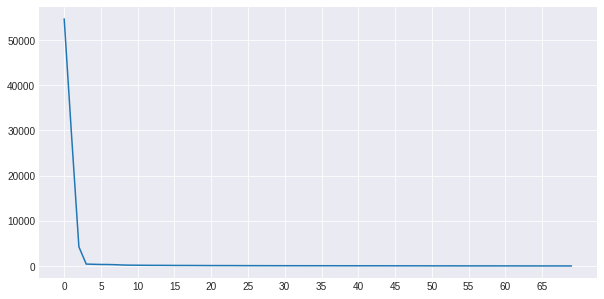

In [61]:
#Set train
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,5))
plt.plot(s)
plt.xticks(list(range(0,70,5)))

([<matplotlib.axis.XTick at 0x7efe52b04828>,
 <a list of 14 Text xticklabel objects>)

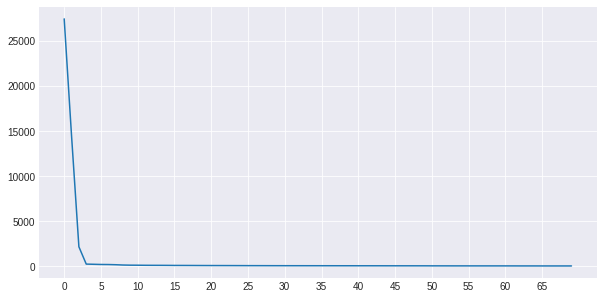

In [62]:
#Set test
plt.figure(figsize = (10,5))
plt.plot(s_test)
plt.xticks(list(range(0,70,5)))

Claramente vemos como con menos de 5 dimensiones podemos concentrar casi la totalidad de la información. 

**Veamos esto en niveles de energía**

In [63]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[7.77045115e+01 2.18077070e+01 4.64465884e-01 4.40418958e-03
 3.46360866e-03 2.74907641e-03 2.57092339e-03 1.90594883e-03
 1.08112079e-03 7.71342647e-04 6.86019503e-04 5.57290856e-04
 4.86365490e-04 4.69453970e-04 4.07682074e-04 3.39115434e-04
 3.19881543e-04 2.98060028e-04 2.55073315e-04 2.31260599e-04
 2.00198784e-04 1.86920318e-04 1.78986176e-04 1.58908332e-04
 1.36736661e-04 1.18967580e-04 1.08456109e-04 1.02571801e-04
 8.91322316e-05 8.05492359e-05 7.55922267e-05 7.04900126e-05
 6.47823368e-05 6.37533644e-05 6.04849580e-05 5.99699305e-05
 5.93688548e-05 4.91419852e-05 4.61331498e-05 4.40891910e-05
 4.14124027e-05 3.62772250e-05 3.59052818e-05 3.47662304e-05
 3.02060908e-05 2.71402978e-05 2.59952783e-05 2.22047830e-05
 2.01009590e-05 1.88470219e-05 1.19707541e-05 9.56188263e-06
 8.79053492e-06 7.04546913e-06 5.76987650e-06 4.75908093e-06
 4.34042040e-06 4.14890915e-06 3.81290749e-06 3.53870164e-06
 2.51260616e-06 2.06503337e-06 1.24822711e-06 8.41106252e-07
 5.40647633e-07 1.358118

In [64]:
energy_total

3844543732.321738

## Ahora veo la energia acumulada 


**Set de train**

In [65]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 54656.96594186719 77.7%
Number of Singular Values 2: 28955.255696048487 99.51%
Number of Singular Values 3: 4225.706334713612 99.98%
Number of Singular Values 4: 411.48632369035244 99.98%
Number of Singular Values 5: 364.9108791838578 99.98%
Number of Singular Values 6: 325.0991308335752 99.99%
Number of Singular Values 7: 314.38873055803134 99.99%
Number of Singular Values 8: 270.69362094590707 99.99%
Number of Singular Values 9: 203.8729050488148 99.99%
Number of Singular Values 10: 172.2051258890939 99.99%
Number of Singular Values 11: 162.40172352795452 99.99%
Number of Singular Values 12: 146.37380461820118 99.99%
Number of Singular Values 13: 136.74258285705804 100.0%
Number of Singular Values 14: 134.34419666898484 100.0%
Number of Singular Values 15: 125.1939121283043 100.0%
Number of Singular Values 16: 114.18161487843982 100.0%
Number of Singular Values 17: 110.8962839535456 100.0%
Number of Singular Values 18: 107.04694351819415 100.0%
Number of 

Veo que con 3 dimensiones tengo el 99.98% de la energía acumulada.

Puedo tomar las primeras 3 columnas de U y multiplicarlas por las 3 primeras filas y columnas de S, para escalar los datos, y agregar esas columnas como features

In [66]:
#set de train, tomo una representación de los datos en 3 dimensiones
aprox3 = np.matrix(u[:, :3]) * np.diag(s[:3]) 
features_svd = pd.DataFrame(aprox3)
features_svd.columns = ['svd1', 'svd2', 'svd3']
features_svd.head()

,svd1,svd2,svd3
0,-133.929403,-16.609355,-0.475789
1,75.275960,-56.375616,-1.310712
2,-30.186876,10.374585,2.910903
3,-155.359628,-16.070291,6.417996
4,-112.836891,-14.313721,-2.380857


In [67]:
features_totales = data_features.join(features_svd)
features_totales.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,prov_Edo. de México,prov_Guanajuato,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas,svd1,svd2,svd3
0,8,2,1,2,80,80,0,0,0,0,0,0.728368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-133.929403,-16.609355,-0.475789
1,10,3,2,2,268,180,0,0,0,1,1,0.297919,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75.275960,-56.375616,-1.310712
2,5,3,2,2,144,166,0,0,0,0,0,0.758488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-30.186876,10.374585,2.910903
3,1,2,1,1,63,67,0,0,0,1,1,0.037240,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-155.359628,-16.070291,6.417996
4,10,2,1,1,95,95,0,0,0,0,0,0.886637,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-112.836891,-14.313721,-2.380857


Hago lo mismo para el set de test

In [68]:
#set de train, tomo una representación de los datos en 3 dimensiones
aprox3_test = np.matrix(u_test[:, :3]) * np.diag(s_test[:3]) 
features_svd_test= pd.DataFrame(aprox3_test)
features_svd_test.columns = ['svd1', 'svd2', 'svd3']
features_svd_test.head()

,svd1,svd2,svd3
0,98.364013,79.360722,-19.969468
1,-151.698027,18.429441,-0.521502
2,-115.479015,5.172338,7.572522
3,-125.008147,15.476961,5.598555
4,-135.911748,19.561245,-2.451692


In [69]:
features_totales_test = data_features_test.join(features_svd_test)
features_totales_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,prov_Edo. de México,prov_Guanajuato,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas,svd1,svd2,svd3
0,29,3,2,4,300,176,0,0,0,0,0,0.309967,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98.364013,79.360722,-19.969468
1,8,1,1,1,67,67,0,0,0,0,0,0.762322,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-151.698027,18.429441,-0.521502
2,0,2,1,2,87,100,0,0,0,0,1,0.681818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-115.479015,5.172338,7.572522
3,2,2,2,2,86,86,0,0,0,0,0,0.650055,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-125.008147,15.476961,5.598555
4,10,2,1,1,80,76,0,0,0,1,1,0.324206,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-135.911748,19.561245,-2.451692


In [70]:
features_totales_test.shape

(60000, 73)

# Modelo Random Forest

### MAE score para RF

In [0]:
X = features_totales

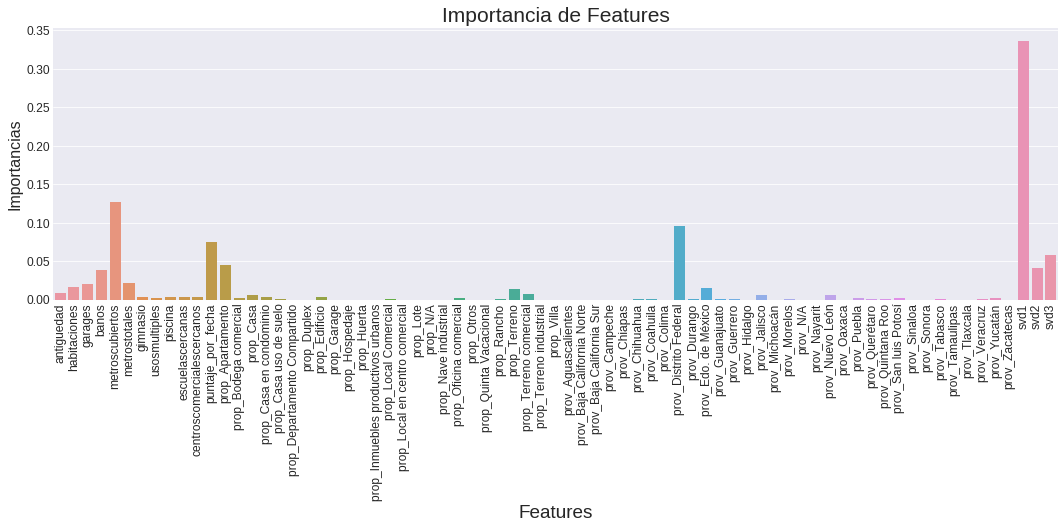

In [72]:
mostrar_importancias(X,Y,RF_model)

Como podemos observar en el gráfico los features sobre la svd son bastante importantes. 

Observemos ahora si esto implica mejoras en las predicciones de nuestro modelo o no.

In [73]:
#Mido el score con Random Forest
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score5 = -scores.mean()
RF_mae_score5

690708.8509149536

**Estos features parecen funcionar bien en mi máquina, pero al probar con un submit en Kaggle el resultado fue muy malo, por lo que se lo descarta.**

# Genero un nuevo feature tomando en cuenta las ciudades en las que se encuentran  las propiedades

In [74]:
train.ciudad.nunique()

876

**Mi idea es crear un rango de valores que pueden tomar las propiedades según las ciudades, y colocar esto como features**

Tomo el mínimo y el máximo y genero dos nuevas columnas con estos valores, asignandolo de acuerdo a la ciudad en la que se encuentra cada propiedad

In [75]:
precios_ciudades = train.groupby('ciudad').agg({'precio': ['min', 'max']}).reset_index()
precios_ciudades.columns = ['ciudad', 'precio_min', 'precio_max']
precios_ciudades.head()

,ciudad,precio_min,precio_max
0,Abalá,315000,315000
1,Abasolo,680000,8500000
2,Abejones,2500000,2500000
3,Acajete,1960000,5800000
4,Acambay,450000,5000000


Como se puede observar hay ciudades que tienen un mismo valor para el mínimo y el máximo, esto puede deberse a que sólo haya una publicación en esa ciudad, o las publicaciones correspondan a la misma propiedad o algún conjunto de propiedades que correspondan al mismo publicitante.

Solucionaremos este problema indicando para esos casos un rango mucho más amplio, para hacerlo tomaremos el mínimo de todas las ciudades y el máximo de todas las cidades.

In [76]:
minimos = list(precios_ciudades['precio_min'])
maximos = list(precios_ciudades['precio_max'])
minimo_total = min(minimos)
maximo_total = max(maximos)
for i in range(len(minimos)):
    if (minimos[i] == maximos[i]):
        minimos[i] = minimo_total
        maximos[i] = maximo_total
precios_ciudades['precio_min'] = pd.Series(minimos)
precios_ciudades['precio_max'] = pd.Series(maximos)
precios_ciudades.head()

,ciudad,precio_min,precio_max
0,Abalá,310000,12525000
1,Abasolo,680000,8500000
2,Abejones,310000,12525000
3,Acajete,1960000,5800000
4,Acambay,450000,5000000


In [0]:
train_features = train.merge(precios_ciudades, on='ciudad')
test_features = test.merge(precios_ciudades, on='ciudad', how = 'left').fillna(0)
#Como puede suceder que haya ciudades que no aparecian en el set de train tomo el mínimo y el máximo valor visto
#en el set de train para cubrir los mínimos y máximos de las ciudades que no tienen precios registrados
minimos = list(test_features['precio_min'])
maximos = list(test_features['precio_max'])
for i in range(len(minimos)):
    if (minimos[i] == maximos[i]):
        minimos[i] = minimo_total
        maximos[i] = maximo_total
test_features['precio_min'] = pd.Series(minimos)
test_features['precio_max'] = pd.Series(maximos)
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos','puntaje_por_fecha',\
            'precio_min', 'precio_max']

In [78]:
test_features.shape

(60000, 25)

## Pruebo el modelo con este nuevo feature

In [0]:
X=train_features[Numericos].join(dummies).join(dummies_prov)
Y=train['precio']

In [0]:
X_test = test_features[Numericos].join(dummies_test).join(dummies_prov_test)

In [81]:
X_test.shape

(60000, 72)

# Modelo Random Forest

### MAE score para RF

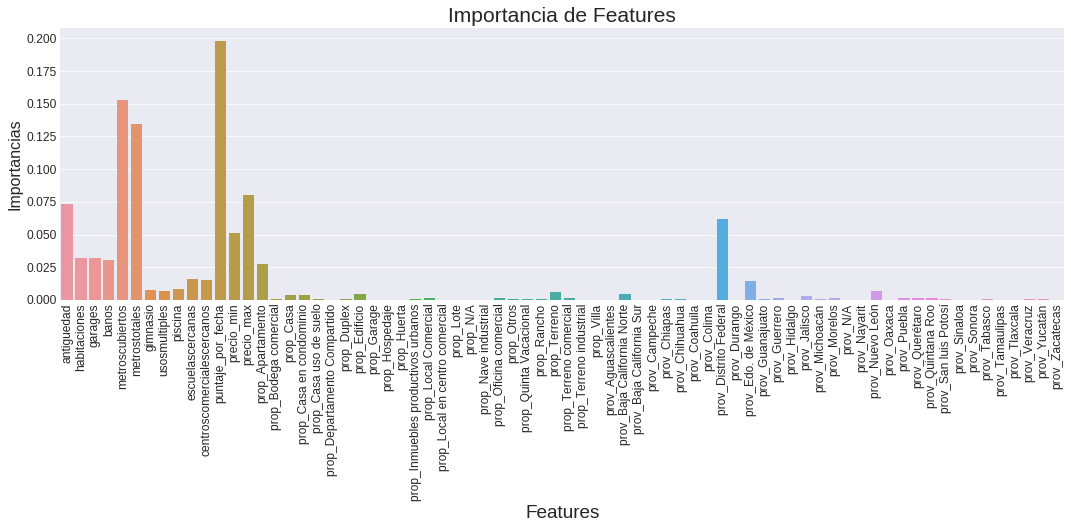

In [82]:
mostrar_importancias(X,Y, RF_model)

**Pruebo el modelo con los nuevos features de rango de precios**

In [83]:
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score6= -scores.mean()
RF_mae_score6

1591122.5045448605

**Se puede observar como estos features tampoco resultaron ser muy buenos, ni siquiera normalizando el set de features, por lo que se los descarta.**

## Veo otra alternativa para crear features sobre las ciudades

Utilizaré OneHotEncoding para crear un set de datos donde las columnas seran las ciudades y se marcará con 0 y 1 según si la publicación pertenece o no a cada ciudad. 

In [0]:
enc_ciud = OneHotEncoder(handle_unknown='ignore')
dummies_ciud = enc_ciud.fit_transform(train['ciudad'].values.reshape(-1, 1)).toarray()
dummies_ciud = pd.DataFrame(dummies_ciud)

dummies_ciud_test = enc_ciud.transform(test['ciudad'].values.reshape(-1, 1)).toarray()
dummies_ciud_test = pd.DataFrame(dummies_ciud_test)

dummies_ciud.columns=enc_ciud.categories_[0].tolist()
dummies_ciud=dummies_ciud.add_prefix('ciud_')
dummies_ciud=dummies_ciud.astype(np.int8)

dummies_ciud_test.columns=enc_ciud.categories_[0].tolist()
dummies_ciud_test=dummies_ciud_test.add_prefix('ciud_')
dummies_ciud_test=dummies_ciud_test.astype(np.int8)

In [85]:
dummies_ciud.head()

,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,ciud_Acayucan,ciud_Acolman,ciud_Aconchi,ciud_Actopan,ciud_Acuitzio,ciud_Aculco,ciud_Acuña,ciud_Agua Dulce,ciud_Agua Prieta,ciud_Aguascalientes,ciud_Ahome,ciud_Ahuacatlán,ciud_Ahualulco,ciud_Ahualulco de Mercado,ciud_Ahuazotepec,ciud_Ajacuba,ciud_Alamo Temapache,ciud_Alamos,ciud_Aldama,ciud_Allende,ciud_Almoloya,ciud_Almoloya de Alquisiras,ciud_Almoloya de Juárez,ciud_Almoloya del Río,ciud_Altamira,ciud_Altotonga,ciud_Alvarado,ciud_Alvaro Obregón,ciud_Amacuzac,ciud_Amanalco,...,ciud_Yauhquemecan,ciud_Yauhquemehcan,ciud_Yautepec,ciud_Yaxcabá,ciud_Yaxkukul,ciud_Yecapixtla,ciud_Yobaín,ciud_Yuriria,ciud_Zacapu,ciud_Zacatecas,ciud_Zacatelco,ciud_Zacatepec,ciud_Zacatlán,ciud_Zacoalco de Torres,ciud_Zacualpan,ciud_Zamora,ciud_Zapopan,ciud_Zapotiltic,ciud_Zapotlanejo,ciud_Zapotlán de Juárez,ciud_Zapotlán el Grande,ciud_Zaragoza,ciud_Zempoala,ciud_Zihuatanejo de Azueta,ciud_Zimapán,ciud_Zimatlán de Alvarez,ciud_Zinacantepec,ciud_Zinapécuaro,ciud_Zináparo,ciud_ZirAndaro,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán,ciud_ácatlán de Juárez,ciud_ácaxochitlán,ciud_ácámbaro,ciud_áutlán de Navarro,ciud_áyotlán
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
dummies_ciud_test.head()

,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,ciud_Acayucan,ciud_Acolman,ciud_Aconchi,ciud_Actopan,ciud_Acuitzio,ciud_Aculco,ciud_Acuña,ciud_Agua Dulce,ciud_Agua Prieta,ciud_Aguascalientes,ciud_Ahome,ciud_Ahuacatlán,ciud_Ahualulco,ciud_Ahualulco de Mercado,ciud_Ahuazotepec,ciud_Ajacuba,ciud_Alamo Temapache,ciud_Alamos,ciud_Aldama,ciud_Allende,ciud_Almoloya,ciud_Almoloya de Alquisiras,ciud_Almoloya de Juárez,ciud_Almoloya del Río,ciud_Altamira,ciud_Altotonga,ciud_Alvarado,ciud_Alvaro Obregón,ciud_Amacuzac,ciud_Amanalco,...,ciud_Yauhquemecan,ciud_Yauhquemehcan,ciud_Yautepec,ciud_Yaxcabá,ciud_Yaxkukul,ciud_Yecapixtla,ciud_Yobaín,ciud_Yuriria,ciud_Zacapu,ciud_Zacatecas,ciud_Zacatelco,ciud_Zacatepec,ciud_Zacatlán,ciud_Zacoalco de Torres,ciud_Zacualpan,ciud_Zamora,ciud_Zapopan,ciud_Zapotiltic,ciud_Zapotlanejo,ciud_Zapotlán de Juárez,ciud_Zapotlán el Grande,ciud_Zaragoza,ciud_Zempoala,ciud_Zihuatanejo de Azueta,ciud_Zimapán,ciud_Zimatlán de Alvarez,ciud_Zinacantepec,ciud_Zinapécuaro,ciud_Zináparo,ciud_ZirAndaro,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán,ciud_ácatlán de Juárez,ciud_ácaxochitlán,ciud_ácámbaro,ciud_áutlán de Navarro,ciud_áyotlán
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Pruebo el modelo agregando todas las columnas

In [87]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos', 'puntaje_por_fecha']
X= train[Numericos].join(dummies).join(dummies_prov).join(dummies_ciud)
X_test = test[Numericos].join(dummies_test).join(dummies_prov_test).join(dummies_ciud_test)
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,...,ciud_Yauhquemecan,ciud_Yauhquemehcan,ciud_Yautepec,ciud_Yaxcabá,ciud_Yaxkukul,ciud_Yecapixtla,ciud_Yobaín,ciud_Yuriria,ciud_Zacapu,ciud_Zacatecas,ciud_Zacatelco,ciud_Zacatepec,ciud_Zacatlán,ciud_Zacoalco de Torres,ciud_Zacualpan,ciud_Zamora,ciud_Zapopan,ciud_Zapotiltic,ciud_Zapotlanejo,ciud_Zapotlán de Juárez,ciud_Zapotlán el Grande,ciud_Zaragoza,ciud_Zempoala,ciud_Zihuatanejo de Azueta,ciud_Zimapán,ciud_Zimatlán de Alvarez,ciud_Zinacantepec,ciud_Zinapécuaro,ciud_Zináparo,ciud_ZirAndaro,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán,ciud_ácatlán de Juárez,ciud_ácaxochitlán,ciud_ácámbaro,ciud_áutlán de Navarro,ciud_áyotlán
0,8,2,1,2,80,80,0,0,0,0,0,0.728368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,3,2,2,268,180,0,0,0,1,1,0.297919,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,3,2,2,144,166,0,0,0,0,0,0.758488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,1,1,63,67,0,0,0,1,1,0.037240,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,2,1,1,95,95,0,0,0,0,0,0.886637,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score7= -scores.mean()
RF_mae_score7

611241.1766120424

## Pruebo con los datos normalizados

In [0]:
X_norm = normalizar_data(X)
X_test_norm = normalizar_data(X_test)

In [90]:
RF_model.fit(X_norm,Y)
scores = cross_val_score(RF_model , X_norm, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score9= -scores.mean()
RF_mae_score9

610732.1056354909

**Como tengo demasiadas ciudades como para generar una columna por cada una, y además la cantidad de ciudades no coinciden para el set de train y el set de test, lo que voy a hacer es utilizar la SVD para obtener features.**

In [91]:
centered = dummies_ciud - dummies_ciud.mean()
centered.head()

,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,ciud_Acayucan,ciud_Acolman,ciud_Aconchi,ciud_Actopan,ciud_Acuitzio,ciud_Aculco,ciud_Acuña,ciud_Agua Dulce,ciud_Agua Prieta,ciud_Aguascalientes,ciud_Ahome,ciud_Ahuacatlán,ciud_Ahualulco,ciud_Ahualulco de Mercado,ciud_Ahuazotepec,ciud_Ajacuba,ciud_Alamo Temapache,ciud_Alamos,ciud_Aldama,ciud_Allende,ciud_Almoloya,ciud_Almoloya de Alquisiras,ciud_Almoloya de Juárez,ciud_Almoloya del Río,ciud_Altamira,ciud_Altotonga,ciud_Alvarado,ciud_Alvaro Obregón,ciud_Amacuzac,ciud_Amanalco,...,ciud_Yauhquemecan,ciud_Yauhquemehcan,ciud_Yautepec,ciud_Yaxcabá,ciud_Yaxkukul,ciud_Yecapixtla,ciud_Yobaín,ciud_Yuriria,ciud_Zacapu,ciud_Zacatecas,ciud_Zacatelco,ciud_Zacatepec,ciud_Zacatlán,ciud_Zacoalco de Torres,ciud_Zacualpan,ciud_Zamora,ciud_Zapopan,ciud_Zapotiltic,ciud_Zapotlanejo,ciud_Zapotlán de Juárez,ciud_Zapotlán el Grande,ciud_Zaragoza,ciud_Zempoala,ciud_Zihuatanejo de Azueta,ciud_Zimapán,ciud_Zimatlán de Alvarez,ciud_Zinacantepec,ciud_Zinapécuaro,ciud_Zináparo,ciud_ZirAndaro,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán,ciud_ácatlán de Juárez,ciud_ácaxochitlán,ciud_ácámbaro,ciud_áutlán de Navarro,ciud_áyotlán
0,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,-0.000008,-0.000304,-0.000008,-0.00005,-0.000004,-0.000021,-0.000017,-0.000004,-0.000017,-0.00605,-0.000625,-0.000008,-0.000008,-0.000008,-0.000004,-0.000004,-0.000008,-0.000004,-0.00005,-0.000196,-0.000004,-0.000004,-0.000233,-0.000004,-0.001158,-0.000004,-0.003879,-0.027637,-0.000017,-0.000008,...,-0.000112,-0.000183,-0.002571,-0.000004,-0.000004,-0.00005,-0.000021,-0.000004,-0.000013,-0.000158,-0.000087,-0.000013,-0.000021,-0.000017,-0.000004,-0.000542,-0.043167,-0.000013,-0.000025,-0.00005,-0.00005,-0.000008,-0.000233,-0.0006,-0.000004,-0.000004,-0.000642,-0.000004,-0.000004,-0.000004,-0.000033,-0.000017,-0.000867,-0.000092,-0.000004,-0.000004,-0.000021,-0.000013,-0.000004,-0.000004
1,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,-0.000008,-0.000304,-0.000008,-0.00005,-0.000004,-0.000021,-0.000017,-0.000004,-0.000017,-0.00605,-0.000625,-0.000008,-0.000008,-0.000008,-0.000004,-0.000004,-0.000008,-0.000004,-0.00005,-0.000196,-0.000004,-0.000004,-0.000233,-0.000004,-0.001158,-0.000004,-0.003879,-0.027637,-0.000017,-0.000008,...,-0.000112,-0.000183,-0.002571,-0.000004,-0.000004,-0.00005,-0.000021,-0.000004,-0.000013,-0.000158,-0.000087,-0.000013,-0.000021,-0.000017,-0.000004,-0.000542,-0.043167,-0.000013,-0.000025,-0.00005,-0.00005,-0.000008,-0.000233,-0.0006,-0.000004,-0.000004,-0.000642,-0.000004,-0.000004,-0.000004,-0.000033,-0.000017,-0.000867,-0.000092,-0.000004,-0.000004,-0.000021,-0.000013,-0.000004,-0.000004
2,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,-0.000008,-0.000304,-0.000008,-0.00005,-0.000004,-0.000021,-0.000017,-0.000004,-0.000017,-0.00605,-0.000625,-0.000008,-0.000008,-0.000008,-0.000004,-0.000004,-0.000008,-0.000004,-0.00005,-0.000196,-0.000004,-0.000004,-0.000233,-0.000004,-0.001158,-0.000004,-0.003879,-0.027637,-0.000017,-0.000008,...,-0.000112,-0.000183,-0.002571,-0.000004,-0.000004,-0.00005,-0.000021,-0.000004,-0.000013,-0.000158,-0.000087,-0.000013,-0.000021,-0.000017,-0.000004,-0.000542,-0.043167,-0.000013,-0.000025,-0.00005,-0.00005,-0.000008,-0.000233,-0.0006,-0.000004,-0.000004,-0.000642,-0.000004,-0.000004,-0.000004,-0.000033,-0.000017,-0.000867,-0.000092,-0.000004,-0.000004,-0.000021,-0.000013,-0.000004,-0.000004
3,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,-0.000008,-0.000304,-0.000008,-0.00005,-0.000004,-0.000021,-0.000017,-0.000004,-0.000017,-0.00605,-0.000625,-0.000008,-0.000008,-0.000008,-0.000004,-0.000004,-0.000008,-0.000004,-0.00005,-0.000196,-0.000004,-0.000004,-0.000233

In [92]:
centered_test = dummies_ciud_test - dummies_ciud_test.mean()
centered_test.head()

,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,ciud_Acayucan,ciud_Acolman,ciud_Aconchi,ciud_Actopan,ciud_Acuitzio,ciud_Aculco,ciud_Acuña,ciud_Agua Dulce,ciud_Agua Prieta,ciud_Aguascalientes,ciud_Ahome,ciud_Ahuacatlán,ciud_Ahualulco,ciud_Ahualulco de Mercado,ciud_Ahuazotepec,ciud_Ajacuba,ciud_Alamo Temapache,ciud_Alamos,ciud_Aldama,ciud_Allende,ciud_Almoloya,ciud_Almoloya de Alquisiras,ciud_Almoloya de Juárez,ciud_Almoloya del Río,ciud_Altamira,ciud_Altotonga,ciud_Alvarado,ciud_Alvaro Obregón,ciud_Amacuzac,ciud_Amanalco,...,ciud_Yauhquemecan,ciud_Yauhquemehcan,ciud_Yautepec,ciud_Yaxcabá,ciud_Yaxkukul,ciud_Yecapixtla,ciud_Yobaín,ciud_Yuriria,ciud_Zacapu,ciud_Zacatecas,ciud_Zacatelco,ciud_Zacatepec,ciud_Zacatlán,ciud_Zacoalco de Torres,ciud_Zacualpan,ciud_Zamora,ciud_Zapopan,ciud_Zapotiltic,ciud_Zapotlanejo,ciud_Zapotlán de Juárez,ciud_Zapotlán el Grande,ciud_Zaragoza,ciud_Zempoala,ciud_Zihuatanejo de Azueta,ciud_Zimapán,ciud_Zimatlán de Alvarez,ciud_Zinacantepec,ciud_Zinapécuaro,ciud_Zináparo,ciud_ZirAndaro,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán,ciud_ácatlán de Juárez,ciud_ácaxochitlán,ciud_ácámbaro,ciud_áutlán de Navarro,ciud_áyotlán
0,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,-0.000017,0.0,-0.000017,-0.000017,-0.006317,-0.000683,0.0,-0.000017,0.0,0.0,0.0,0.0,0.0,-0.000017,-0.000217,0.0,0.0,-0.00025,0.0,-0.001267,0.0,-0.00415,-0.026533,-0.000067,0.0,...,-0.000067,-0.00015,-0.002517,0.0,0.0,-0.000117,-0.000017,0.0,-0.00005,-0.000233,-0.00005,0.0,-0.000017,-0.000017,0.0,-0.00065,-0.042733,-0.000017,-0.000083,-0.000017,-0.000017,0.0,-0.000233,-0.000567,0.0,0.0,-0.000617,0.0,0.0,0.0,-0.00005,-0.000033,-0.0009,-0.000083,0.0,-0.000033,0.0,0.0,0.0,0.0
1,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,-0.000017,0.0,-0.000017,-0.000017,-0.006317,-0.000683,0.0,-0.000017,0.0,0.0,0.0,0.0,0.0,-0.000017,-0.000217,0.0,0.0,-0.00025,0.0,-0.001267,0.0,-0.00415,-0.026533,-0.000067,0.0,...,-0.000067,-0.00015,-0.002517,0.0,0.0,-0.000117,-0.000017,0.0,-0.00005,-0.000233,-0.00005,0.0,-0.000017,-0.000017,0.0,-0.00065,-0.042733,-0.000017,-0.000083,-0.000017,-0.000017,0.0,-0.000233,-0.000567,0.0,0.0,-0.000617,0.0,0.0,0.0,-0.00005,-0.000033,-0.0009,-0.000083,0.0,-0.000033,0.0,0.0,0.0,0.0
2,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,-0.000017,0.0,-0.000017,-0.000017,-0.006317,-0.000683,0.0,-0.000017,0.0,0.0,0.0,0.0,0.0,-0.000017,-0.000217,0.0,0.0,-0.00025,0.0,-0.001267,0.0,-0.00415,-0.026533,-0.000067,0.0,...,-0.000067,-0.00015,-0.002517,0.0,0.0,-0.000117,-0.000017,0.0,-0.00005,-0.000233,-0.00005,0.0,-0.000017,-0.000017,0.0,-0.00065,-0.042733,-0.000017,-0.000083,-0.000017,-0.000017,0.0,-0.000233,-0.000567,0.0,0.0,-0.000617,0.0,0.0,0.0,-0.00005,-0.000033,-0.0009,-0.000083,0.0,-0.000033,0.0,0.0,0.0,0.0
3,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,0.988917,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,-0.000017,0.0,-0.000017,-0.000017,-0.006317,-0.000683,0.0,-0.000017,0.0,0.0,0.0,0.0,0.0,-0.000017,-0.000217,0.0,0.0,-0.00025,0.0,-0.001267,0.0,-0.00415,-0.026533,-0.000067,0.0,...,-0.000067,-0.00015,-0.002517,0.0,0.0,-0.000117,-0.000017,0.0,-0.00005,-0.000233,-0.00005,0.0,-0.000017,-0.000017,0.0,-0.00065,-0.042733,-0.000017,-0.000083,-0.000017,-0.000017,0.0,-0.000233,-0.000567,0.0,0.0,-0.000617,0.0,0.0,0.0,-0.00005,-0.000033,-0.0009,-0.000083,0.0,-0.000033,0.0,0.0,0.0,0.0
4,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,-0.000017,0.0,-0.000017,-0.000017,-0.006317,-0.000683,0.0,-0.000017,0.0,0.0,0.0,0.0,0.0,-0.000017,-0.000217,0.0,0.0,-0.00025,0.0,-0.001267,0.0,-0.00415,-0.026533,-0.000067,0.0,...,-0.000067,-0.00015,-0.002517,0.0,0.0,-0.000117,-0.000017,0.0,-0.00005,-0.000233,-0.00005,0.0,-0

In [0]:
u, s, vt = svd(centered, full_matrices = False)

u_test, s_test, vt_test = svd(centered_test, full_matrices = False)

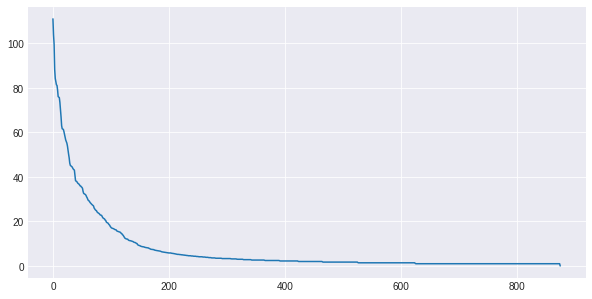

In [94]:
#Set train
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,5))
plt.plot(s)


In [0]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)

In [96]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 111.01234961051424 5.24%
Number of Singular Values 2: 103.88687274477556 9.82%
Number of Singular Values 3: 99.66048027637918 14.04%
Number of Singular Values 4: 88.3231018190471 17.36%
Number of Singular Values 5: 84.26237772531418 20.37%
Number of Singular Values 6: 82.87681123813609 23.29%
Number of Singular Values 7: 81.3892921371276 26.1%
Number of Singular Values 8: 81.10141072542766 28.9%
Number of Singular Values 9: 79.09548617615513 31.56%
Number of Singular Values 10: 76.08890067532423 34.02%
Number of Singular Values 11: 75.85566382503265 36.46%
Number of Singular Values 12: 75.62717227661054 38.89%
Number of Singular Values 13: 73.48647155400046 41.19%
Number of Singular Values 14: 70.2982531435989 43.28%
Number of Singular Values 15: 66.93590988363044 45.19%
Number of Singular Values 16: 62.99224769418365 46.87%
Number of Singular Values 17: 61.622405354107556 48.49%
Number of Singular Values 18: 61.4576541197233 50.09%
Number of Singular Value

In [0]:
singular_values = s_test
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)

In [98]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 56.04889920142499 5.34%
Number of Singular Values 2: 52.27991193912533 9.99%
Number of Singular Values 3: 49.67681057487258 14.19%
Number of Singular Values 4: 43.874238817400716 17.46%
Number of Singular Values 5: 42.6218684712247 20.55%
Number of Singular Values 6: 41.722212525407414 23.51%
Number of Singular Values 7: 40.550222596892425 26.31%
Number of Singular Values 8: 40.12225647138544 29.05%
Number of Singular Values 9: 39.26650255597896 31.67%
Number of Singular Values 10: 37.99589777102201 34.13%
Number of Singular Values 11: 37.73167166680756 36.55%
Number of Singular Values 12: 37.31784564527936 38.92%
Number of Singular Values 13: 36.48051608620744 41.18%
Number of Singular Values 14: 34.762391563036545 43.24%
Number of Singular Values 15: 32.47972150411574 45.03%
Number of Singular Values 16: 31.652123204633416 46.74%
Number of Singular Values 17: 30.87812272522478 48.36%
Number of Singular Values 18: 30.569591961446623 49.95%
Number of Singul

**Vemos que con 80 dimensiones podemos capturar aproximadamente el 90% de la información sobre las ciudades y con 19 el 50%.**

In [99]:
aprox19 = np.matrix(u[:, :19]) * np.diag(s[:19]) 
features_svd = pd.DataFrame(aprox19)
features_svd = features_svd.add_prefix('svd_')
features_svd.head()

,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,-0.231216,-0.871479,0.331725,-0.036399,-0.014259,0.015972,-0.001510,0.004177,-0.029886,0.000800,-0.003219,0.000200,-0.015688,0.028052,-0.018855,0.004915,-0.000921,0.000195,0.000705
1,-0.029066,0.021721,-0.044705,0.019836,0.010743,-0.013340,0.001404,-0.003966,0.032681,-0.001076,0.004398,-0.000278,0.025197,-0.056089,0.047834,-0.016785,0.003513,-0.000752,-0.002753
2,-0.026263,0.019306,-0.039266,0.016688,0.008849,-0.010898,0.001137,-0.003204,0.026029,-0.000836,0.003412,-0.000215,0.019116,-0.041056,0.033409,-0.010907,0.002213,-0.000472,-0.001722
3,-0.024884,0.018146,-0.036700,0.015294,0.008035,-0.009861,0.001024,-0.002885,0.023303,-0.000742,0.003023,-0.000190,0.016787,-0.035576,0.028474,-0.009079,0.001825,-0.000389,-0.001417
4,-0.154212,0.446372,0.838864,-0.045701,-0.017120,0.018964,-0.001774,0.004899,-0.034649,0.000914,-0.003676,0.000228,-0.017757,0.031437,-0.020953,0.005418,-0.001013,0.000214,0.000775


In [100]:
aprox19_test = np.matrix(u_test[:, :19]) * np.diag(s_test[:19]) 
features_svd_test = pd.DataFrame(aprox19_test)
features_svd_test = features_svd_test.add_prefix('svd_')
features_svd_test.head()

,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,-0.047069,0.047425,-0.080342,0.045830,-0.046664,0.078231,-0.038254,0.062159,-0.249996,0.216632,-0.711792,0.465718,-0.228688,0.233863,-0.037043,0.029559,0.012181,-0.007262,0.004202
1,-0.062307,0.069781,-0.134177,0.268265,0.874543,-0.261213,0.045096,-0.052787,0.106247,-0.015212,0.013192,0.024446,-0.038405,0.077106,-0.017080,0.014641,0.006370,-0.003870,0.002260
2,-0.044272,0.043800,-0.072798,0.037746,-0.036683,0.058571,-0.025893,0.039783,-0.133970,0.043882,-0.046845,-0.127161,0.817432,0.492455,-0.053061,0.040118,0.015937,-0.009386,0.005400
3,-0.032795,0.030204,-0.046874,0.018513,-0.016233,0.023616,-0.008919,0.012750,-0.035883,0.007703,-0.007204,-0.014963,0.029254,-0.089330,0.034301,-0.036341,-0.019533,0.012974,-0.007948
4,-0.027924,0.024985,-0.037813,0.013786,-0.011805,0.016850,-0.006189,0.008749,-0.024039,0.004954,-0.004591,-0.009389,0.017742,-0.049767,0.016273,-0.015922,-0.007821,0.004984,-0.002984


## Pruebo el modelo

In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos','puntaje_por_fecha']
X = train[Numericos].join(dummies).join(dummies_prov).join(features_svd)
Y = train['precio']

In [102]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,...,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,8,2,1,2,80,80,0,0,0,0,0,0.728368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.231216,-0.871479,0.331725,-0.036399,-0.014259,0.015972,-0.001510,0.004177,-0.029886,0.000800,-0.003219,0.000200,-0.015688,0.028052,-0.018855,0.004915,-0.000921,0.000195,0.000705
1,10,3,2,2,268,180,0,0,0,1,1,0.297919,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.029066,0.021721,-0.044705,0.019836,0.010743,-0.013340,0.001404,-0.003966,0.032681,-0.001076,0.004398,-0.000278,0.025197,-0.056089,0.047834,-0.016785,0.003513,-0.000752,-0.002753
2,5,3,2,2,144,166,0,0,0,0,0,0.758488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.026263,0.019306,-0.039266,0.016688,0.008849,-0.010898,0.001137,-0.003204,0.026029,-0.000836,0.003412,-0.000215,0.019116,-0.041056,0.033409,-0.010907,0.002213,-0.000472,-0.001722
3,1,2,1,1,63,67,0,0,0,1,1,0.037240,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.024884,0.018146,-0.036700,0.015294,0.008035,-0.009861,0.001024,-0.002885,0.023303,-0.000742,0.003023,-0.000190,0.016787,-0.035576,0.028474,-0.009079,0.001825,-0.000389,-0.001417
4,10,2,1,1,95,95,0,0,0,0,0,0.886637,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.154212,0.446372,0.838864,-0.045701,-0.017120,0.018964,-0.001774,0.004899,-0.034649,0.000914,-0.003676,0.000228,-0.017757,0.031437,-0.020953,0.005418,-0.001013,0.000214,0.000775


In [103]:
X_test = test[Numericos].join(dummies_test).join(dummies_prov_test).join(features_svd_test)
X_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,...,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,29,3,2,4,300,176,0,0,0,0,0,0.309967,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.047069,0.047425,-0.080342,0.045830,-0.046664,0.078231,-0.038254,0.062159,-0.249996,0.216632,-0.711792,0.465718,-0.228688,0.233863,-0.037043,0.029559,0.012181,-0.007262,0.004202
1,8,1,1,1,67,67,0,0,0,0,0,0.762322,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.062307,0.069781,-0.134177,0.268265,0.874543,-0.261213,0.045096,-0.052787,0.106247,-0.015212,0.013192,0.024446,-0.038405,0.077106,-0.017080,0.014641,0.006370,-0.003870,0.002260
2,0,2,1,2,87,100,0,0,0,0,1,0.681818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.044272,0.043800,-0.072798,0.037746,-0.036683,0.058571,-0.025893,0.039783,-0.133970,0.043882,-0.046845,-0.127161,0.817432,0.492455,-0.053061,0.040118,0.015937,-0.009386,0.005400
3,2,2,2,2,86,86,0,0,0,0,0,0.650055,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.032795,0.030204,-0.046874,0.018513,-0.016233,0.023616,-0.008919,0.012750,-0.035883,0.007703,-0.007204,-0.014963,0.029254,-0.089330,0.034301,-0.036341,-0.019533,0.012974,-0.007948
4,10,2,1,1,80,76,0,0,0,1,1,0.324206,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.027924,0.024985,-0.037813,0.013786,-0.011805,0.016850,-0.006189,0.008749,-0.024039,0.004954,-0.004591,-0.009389,0.017742,-0.049767,0.016273,-0.015922,-0.007821,0.004984,-0.002984


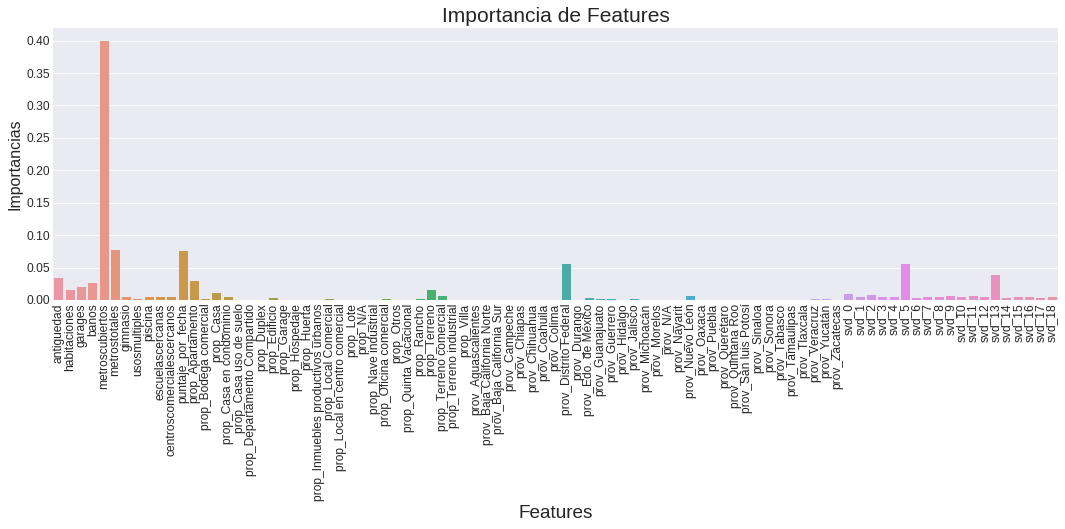

In [104]:
mostrar_importancias(X,Y, RF_model)

In [105]:
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score10= -scores.mean()
RF_mae_score10

617145.4222648554

## Pruebo con los datos normalizados 

In [0]:
X_normalized = normalizar_data(X)
X_test_normalized = normalizar_data(X_test)

In [107]:
X_test_normalized.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,...,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,0.3625,0.222222,0.666667,1.000000,0.672170,0.379717,0.0,0.0,0.0,0.0,0.0,0.309967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163644,0.745423,0.079558,0.814541,0.282716,0.808033,0.367262,0.540753,0.098893,0.777622,2.442491e-15,1.000000,0.143768,0.693301,0.690882,0.278081,0.321239,0.585382,0.549523
1,0.1000,0.000000,0.333333,0.000000,0.122642,0.122642,0.0,0.0,0.0,0.0,0.0,0.762322,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.150715,0.763110,0.027867,1.000000,1.000000,0.509207,0.428865,0.454885,0.464721,0.603764,5.296984e-01,0.651173,0.299512,0.507384,0.707096,0.265198,0.316593,0.587962,0.548125
2,0.0000,0.111111,0.333333,0.333333,0.169811,0.200472,0.0,0.0,0.0,0.0,1.0,0.681818,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166016,0.742556,0.086802,0.807801,0.290487,0.790726,0.376398,0.524038,0.218041,0.648078,4.858327e-01,0.531327,1.000000,1.000000,0.677872,0.287199,0.324241,0.583766,0.550386
3,0.0250,0.111111,0.666667,0.333333,0.167453,0.167453,0.0,0.0,0.0,0.0,0.0,0.650055,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175754,0.731800,0.111694,0.791764,0.306410,0.759954,0.388943,0.503843,0.318767,0.620947,5.147957e-01,0.620020,0.354889,0.309984,0.748828,0.221173,0.295888,0.600772,0.540771
4,0.1250,0.111111,0.333333,0.000000,0.153302,0.143868,0.0,0.0,0.0,1.0,1.0,0.324206,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179887,0.727671,0.120394,0.787823,0.309858,0.753997,0.390961,0.500855,0.330929,0.618886,5.167056e-01,0.624426,0.345467,0.356907,0.734186,0.238806,0.305250,0.594695,0.544347


**Pruebo el modelo con los datos normalizados**

In [108]:
#Utilizo el modelo que funciona mejor, Random Forest
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score11 = -scores.mean()
RF_mae_score11

616826.9526992624

**Las veces que se utiliza la svd los resultados parecen buenos para el sset de tarin pero no lo son para el set de test, por lo que no se utilizará. Para solucionar el tema del gran número de columnas probaremos otro tipo de encoder para las ciudades**

## Target Encoder para las ciudades

Utilizo el campo de metrostotales como target pues como hemos visto en el TP1 el precio está fuertemente ligado a la cantidad de metrostotales, como en el set de test no disponemos del precio me parecio una buena idea usarlo de esta manera, sin mencionar que este feature resulta ser el más importante, según las importancias devueltas por random forest.

In [0]:
target_enc = ce.TargetEncoder(cols = ['ciudad'])
target_enc.fit(train[['ciudad']], train['metrostotales'])
encoder_ciud = target_enc.transform(train[['ciudad']]).add_suffix('_target')
encoder_ciud_test = target_enc.transform(test[['ciudad']]).add_suffix('_target')

In [110]:
encoder_ciud.head()

,ciudad_target
0,153.438442
1,209.363780
2,113.412358
3,172.811688
4,170.897104


In [111]:
encoder_ciud_test.head()

,ciudad_target
0,162.858499
1,239.065345
2,170.360098
3,172.839853
4,118.508260


## Pruebo el modelo con el nuevo feature

In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos','puntaje_por_fecha']
X = train[Numericos].join(dummies).join(dummies_prov).join(encoder_ciud)
X_test = test[Numericos].join(dummies_test).join(dummies_prov_test).join(encoder_ciud_test)
Y = train['precio']

In [113]:
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score12= -scores.mean()
RF_mae_score12

624435.112370902

In [114]:
#Pruebo con los datos normalizados
X_norm = normalizar_data(X)
X_test_norm = normalizar_data(X_test)
RF_model.fit(X_norm,Y)
scores = cross_val_score(RF_model , X_norm, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score13= -scores.mean()
RF_mae_score13

624529.0095501358

## Pruebo otra alternativa: CatBoostEncoder para las ciudades

In [0]:
catBoost_enc = ce.CatBoostEncoder(cols=['ciudad'])

catBoost_enc.fit(train[['ciudad']], train['metrostotales'])

catboost_ciudades = catBoost_enc.transform(train[['ciudad']]).add_suffix('_catboost')
catboost_ciudades_test = catBoost_enc.transform(test[['ciudad']]).add_suffix('_catboost')


In [116]:
catboost_ciudades.head()

,ciudad_catboost
0,153.440564
1,209.346703
2,113.492211
3,172.837519
4,170.897675


In [117]:
catboost_ciudades_test.head()

,ciudad_catboost
0,162.860907
1,239.056654
2,170.361318
3,172.841473
4,118.564869


## Vuelvo a probar el modelo

In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos','puntaje_por_fecha']
X = train[Numericos].join(dummies).join(dummies_prov).join(catboost_ciudades)
X_test = test[Numericos].join(dummies_test).join(dummies_prov_test).join(catboost_ciudades_test)
Y = train['precio']

In [119]:
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score14= -scores.mean()
RF_mae_score14

623413.1585765672

In [120]:
#Pruebo con los datos normalizados
X_norm = normalizar_data(X)
X_test_norm = normalizar_data(X_test)
RF_model.fit(X_norm,Y)
scores = cross_val_score(RF_model , X_norm, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score15= -scores.mean()
RF_mae_score15

623064.3212412373

## Agrego más features basados en las fechas

In [121]:
train['dia'] = train['fecha'].dt.day
train['mes'] = train['fecha'].dt.month
train['año'] = train['fecha'].dt.year
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,puntaje_por_fecha,dia,mes,año
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8,2,1,2,80,80,23533.0,0.000000,0.000000,2015-08-23,0,0,0,0,0,2273000,0.728368,23,8,2015
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,2,268,180,24514.0,19.310205,-99.227655,2013-06-28,0,0,0,1,1,3600000,0.297919,28,6,2013
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,2,144,166,48551.0,0.000000,0.000000,2015-10-17,0,0,0,0,0,1200000,0.758488,17,10,2015
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,1,63,67,53666.0,19.301890,-99.688015,2012-03-09,0,0,0,1,1,650000,0.037240,9,3,2012
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,1,95,95,47835.0,0.000000,0.000000,2016-06-07,0,0,0,0,0,1150000,0.886637,7,6,2016


In [122]:
test['dia'] = test['fecha'].dt.day
test['mes'] = test['fecha'].dt.month
test['año'] = test['fecha'].dt.year
test.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,dia,mes,año
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29,3,2,4,300,176,0.0,19.408668,-99.246767,2013-07-20,0,0,0,0,0,0.309967,20,7,2013
1,51775,departamentos en venta en montebello,<p>departamento una recamara:\n</p><p>departam...,Apartamento,-,Mérida,Yucatán,8,1,1,1,67,67,113851.0,21.032480,-89.592424,2015-10-24,0,0,0,0,0,0.762322,24,10,2015
2,115253,departamento nuevo delegación coyoacán de 87 m...,"departamento nuevo de 87.06 m2, 1 cajón de est...",Apartamento,"Pueblo de los Reyes, Coyoacán, Mexico D.F.",Coyoacán,Distrito Federal,0,2,1,2,87,100,23620.0,19.332829,-99.152913,2015-05-30,0,0,0,0,1,0.681818,30,5,2015
3,299321,departamento en venta en acapulco,<p> raíces dv001 precioso departamento tipo k...,Apartamento,-,Acapulco de Juárez,Guerrero,2,2,2,2,86,86,129347.0,16.860487,-99.878383,2015-04-02,0,0,0,0,0,0.650055,2,4,2015
4,173570,bonita casa sola equipada de dos niveles en lo...,"<p>casa sola, bonita de dos rec&aacute;maras u...",Casa,CEDROS,Tultitlán,Edo. de México,10,2,1,1,80,76,57125.0,19.640482,-99.127273,2013-08-15,0,0,0,1,1,0.324206,15,8,2013


In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos','puntaje_por_fecha',\
            'dia', 'mes', 'año']
# unificación de los dummies
dummies_tipo_prop = dummies
dummies_tipo_prop_test = dummies_test
dummies=dummies.join(dummies_ciud).join(dummies_prov).join(dummies_palabras_descr)
dummies_test=dummies_test.join(dummies_ciud_test).join(dummies_prov_test).join(dummies_palabras_descr_test)

## Pruebo el modelo con estos nuevos features

In [0]:
X = train[Numericos].join(dummies)
X_test = test[Numericos].join(dummies_test)

In [0]:
#Normalizo los datos
X_norm = normalizar_data(X)
X_test_norm = normalizar_data(X_test)

In [126]:
##Pruebo el modelo
RF_model=RandomForestRegressor()
RF_model.fit(X_norm,Y)
scores = cross_val_score(RF_model , X_norm, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score14= -scores.mean()
RF_mae_score14

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


599104.9204756992

# Pruebo una alternativa sin OneHotEncoder


***Utilizare catboost encoder para tipodepropiedad, provincias, ciudades e idzona***

In [0]:
catBoost_enc = ce.CatBoostEncoder(cols=['ciudad', 'provincia', 'tipodepropiedad', 'idzona'])

catBoost_enc.fit(train[['ciudad', 'provincia', 'tipodepropiedad', 'idzona']], train['metrostotales'])

catboost_result = catBoost_enc.transform(train[['ciudad', 'provincia', 'tipodepropiedad', 'idzona']]).add_suffix('_catboost')
catboost_result_test = catBoost_enc.transform(test[['ciudad', 'provincia', 'tipodepropiedad', 'idzona']]).add_suffix('_catboost')


In [128]:
catboost_result.head()

,ciudad_catboost,provincia_catboost,tipodepropiedad_catboost,idzona_catboost
0,153.440564,166.946060,146.756214,147.563262
1,209.346703,166.946060,170.538751,203.549604
2,113.492211,165.620171,182.972416,124.687577
3,172.837519,174.116608,182.972416,158.459736
4,170.897675,165.620171,146.756214,141.345754


## pruebo el modelo

In [0]:
X = train[Numericos].join(catboost_result).join(dummies_palabras_descr)
X_test = test[Numericos].join(catboost_result_test).join(dummies_palabras_descr_test)
Y = train['precio']

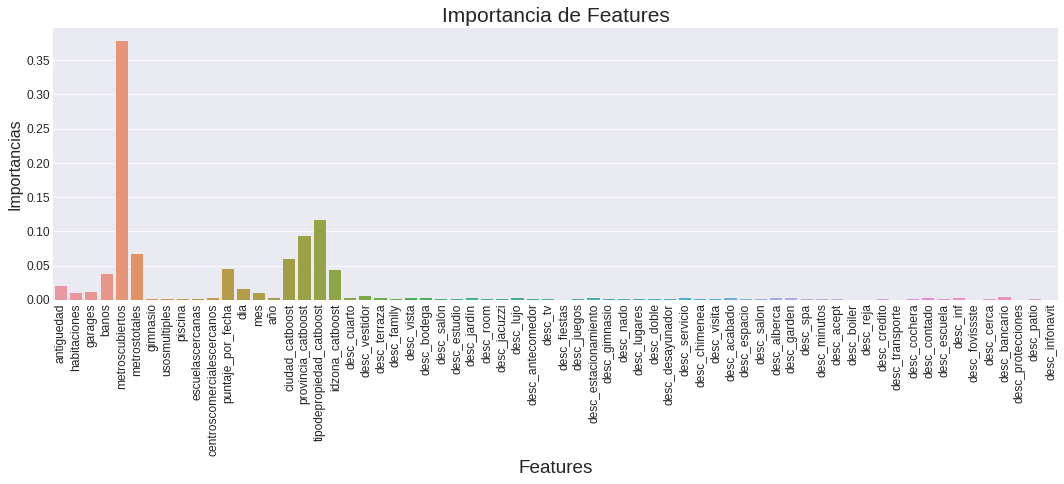

In [130]:
RF_model = RandomForestRegressor(n_estimators=100,random_state=42)
mostrar_importancias(X,Y, RF_model)

In [0]:
#Veo el score
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=5)
RF_mae_score15 = -scores.mean()

In [132]:
RF_mae_score15

569599.9070464509

In [0]:
#normalizo los datos
X_norm = normalizar_data(X)
X_norm_test = normalizar_data(X_test)

In [134]:
X_norm.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,dia,mes,año,ciudad_catboost,provincia_catboost,tipodepropiedad_catboost,idzona_catboost,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,desc_chimenea,desc_visita,desc_acabado,desc_espacio,desc_salon,desc_alberca,desc_garden,desc_spa,desc_minutos,desc_acept,desc_boiler,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,0.0,0.728368,0.733333,0.636364,0.75,0.300528,0.328740,0.281108,0.301002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,1.0,0.297919,0.900000,0.454545,0.25,0.516778,0.328740,0.445469,0.467150,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,0.0,0.758488,0.533333,0.818182,0.75,0.146004,0.316412,0.531398,0.233114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,1.0,0.037240,0.266667,0.181818,0.00,0.375557,0.395413,0.531398,0.333339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,0.0,0.886637,0.200000,0.454545,1.00,0.368053,0.316412,0.281108,0.282550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#Veo el score con los datos normalizados
scores = cross_val_score(RF_model , X_norm, Y, scoring="neg_mean_absolute_error", cv=5)
RF_mae_score16 = -scores.mean()

In [136]:
RF_mae_score16 

569705.8279746913

## Features titulo

Mismo procedimiento anterior pero para palabras que encontramos correlacionadas a mayor o menor precio en 'titulo'

In [0]:
#Paso todas los titulos a minúscula para contar las palabras con mas precision
train['titulo']=train['titulo'].apply(lambda x: x.lower())

In [0]:
Palabras_mayor_precio=['polanco','loma','herradura','condesa','bosque','country',\
                       'hermosa','vista','residencia','condominio','golf','lujo','huixquilucan',\
                      ]
Palabras_menor_precio=['terreno','fracc','casa','villa','remate','recamaras'\
                      ,'ecatepec','cerca','coacalco','izcalli','planta','lote',\
                      'bonita','cautitlan']
Palabras=Palabras_mayor_precio + Palabras_menor_precio

In [0]:
dummies_palabras_titulo=pd.DataFrame()
#Por cada palabra en la lista genero una columna que diga si la descripcion contenia esa palabra o no
for palabra in Palabras:
    dummies_palabras_titulo[palabra]=train['titulo'].apply(lambda x: palabra in x).astype(np.int8)
#Renombro estas columnas agregandoles un prefijo
dummies_palabras_titulo=dummies_palabras_titulo.add_prefix('titl_')

In [140]:
dummies_palabras_titulo.head(3)

,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [0]:
dummies_palabras_titulo_test=pd.DataFrame()
#Hago lo mismo para el set de test
for palabra in Palabras:
    dummies_palabras_titulo_test[palabra]=test['titulo'].apply(lambda x: palabra in x).astype(np.int8)
dummies_palabras_titulo_test=dummies_palabras_titulo_test.add_prefix('titl_')

In [142]:
dummies_palabras_titulo_test.head(3)

,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Unificacion de todos los dummies:

In [0]:
dummies=dummies.join(dummies_palabras_titulo)
dummies_test=dummies_test.join(dummies_palabras_titulo_test)

In [144]:
dummies.count(axis=1)

0         1008
1         1008
2         1008
3         1008
4         1008
          ... 
239995    1008
239996    1008
239997    1008
239998    1008
239999    1008
Length: 240000, dtype: int64

## Agrego features sobre la cantidad de publicaciones

Como hemos visto en el tp1 la cantidad de publicaciones y el precio se comportan igual a través del tiempo, por lo que podríamos estimar el mismo a través de este feature

In [145]:
train['publicaciones_por_mes'] = train[['año','mes', 'id']].groupby(['año','mes']).transform(lambda x: x.count())
train['publicaciones_por_mes'] = train['publicaciones_por_mes'].fillna(0)
train.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,puntaje_por_fecha,dia,mes,año,publicaciones_por_mes
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8,2,1,2,80,80,23533.0,0.0,0.0,2015-08-23,0,0,0,0,0,2273000,0.728368,23,8,2015,4526


In [146]:
test['publicaciones_por_mes'] = test[['año','mes', 'id']].groupby(['año','mes']).transform(lambda x: x.count())
test['publicaciones_por_mes'] = test['publicaciones_por_mes'].fillna(0)
test.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,dia,mes,año,publicaciones_por_mes
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29,3,2,4,300,176,0.0,19.408668,-99.246767,2013-07-20,0,0,0,0,0,0.309967,20,7,2013,650


In [0]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_mes'] 

In [0]:
X = train[Numericos].join(dummies)
X_test = test[Numericos].join(dummies_test)
Y = train['precio']

In [149]:
X.head(2)

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,publicaciones_por_mes,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,...,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan
0,8,2,1,2,80,80,23533.0,0.000000,0.000000,0,0,0,0,0,0.728368,4526,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,3,2,2,268,180,24514.0,19.310205,-99.227655,0,0,0,1,1,0.297919,2016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Pruebo los nuevos features

In [151]:
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score17 = -scores.mean()
RF_mae_score17

570182.0955391052

In [0]:
#normalizo los datos
X_norm = normalizar_data(X)
X_norm_test = normalizar_data(X_test)

In [153]:
#Veo el score con los datos normalizados
scores = cross_val_score(RF_model , X_norm, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score18 = -scores.mean()
RF_mae_score18


570916.9026868164

## Pruebo target encoder en lugar de oneHotEncoder para tipodepropiedad, ciudades, provincias y agrego idzona

In [155]:
train[Numericos].head(1)

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,publicaciones_por_mes
0,8,2,1,2,80,80,23533.0,0.0,0.0,0,0,0,0,0,0.728368,4526


**Primero voy a unificar los dummies que no voy a tocar**

In [0]:
dummies_palabras=dummies_palabras_descr.join(dummies_palabras_titulo)
dummies_palabras_test=dummies_palabras_descr_test.join(dummies_palabras_titulo_test)

**Voy a usar la cantidad de publicaciones por día como target, pues hemos visto que la cantidad de publicaciones aumentaba en el tiempo, al igual que el precio de las propiedades**

In [0]:
train['publicaciones_por_dia'] = train[['dia','año','mes', 'id']].groupby(['dia','año','mes']).transform(lambda x: x.count()).fillna(0)
test['publicaciones_por_dia'] = test[['dia','año','mes', 'id']].groupby(['dia','año','mes']).transform(lambda x: x.count()).fillna(0)

**Agrego además la cantidad de publicaciones para cada año**

In [0]:
train['publicaciones_por_año'] = train[['año','id']].groupby(['año']).transform(lambda x: x.count()).fillna(0)
test['publicaciones_por_año'] = test[['año','id']].groupby(['año']).transform(lambda x: x.count()).fillna(0)

In [0]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_mes', 'publicaciones_por_dia', 'publicaciones_por_año'] 

In [0]:
import category_encoders as ce
cat_cols = ['tipodepropiedad','ciudad', 'provincia', 'idzona']
target_enc = ce.TargetEncoder(cols = cat_cols)
target_enc.fit(train[cat_cols], train['publicaciones_por_año'])
target_encoder_publicaciones = target_enc.transform(train[cat_cols]).add_suffix('_target_publicaciones')
target_encoder_publicaciones_test = target_enc.transform(test[cat_cols]).add_suffix('_target_publicaciones')

In [161]:
target_encoder_publicaciones.head(2)

,tipodepropiedad_target_publicaciones,ciudad_target_publicaciones,provincia_target_publicaciones,idzona_target_publicaciones
0,61817.687763,62912.989286,59017.072019,64651.204819
1,59753.070115,56328.297113,59017.072019,54434.372093


In [162]:
target_encoder_publicaciones_test.head(2)

,tipodepropiedad_target_publicaciones,ciudad_target_publicaciones,provincia_target_publicaciones,idzona_target_publicaciones
0,60391.646507,58258.681622,59017.072019,54717.419377
1,61817.687763,60371.156102,60825.451816,58905.468031


In [0]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_mes', 'publicaciones_por_dia'] 

## Pruebo el modelo con estos features

In [0]:
X = train[Numericos].join(dummies_palabras).join(target_encoder_publicaciones)
Y = train['precio']
X_test = test[Numericos].join(dummies_palabras_test).join(target_encoder_publicaciones_test)

In [165]:
X.head(2)

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,publicaciones_por_mes,publicaciones_por_dia,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,...,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan,tipodepropiedad_target_publicaciones,ciudad_target_publicaciones,provincia_target_publicaciones,idzona_target_publicaciones
0,8,2,1,2,80,80,23533.0,0.000000,0.000000,0,0,0,0,0,0.728368,4526,161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61817.687763,62912.989286,59017.072019,64651.204819
1,10,3,2,2,268,180,24514.0,19.310205,-99.227655,0,0,0,1,1,0.297919,2016,100,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59753.070115,56328.297113,59017.072019,54434.372093


In [166]:
X_test.head(2)

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,publicaciones_por_mes,publicaciones_por_dia,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,...,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan,tipodepropiedad_target_publicaciones,ciudad_target_publicaciones,provincia_target_publicaciones,idzona_target_publicaciones
0,29,3,2,4,300,176,0.0,19.408668,-99.246767,0,0,0,0,0,0.309967,650,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60391.646507,58258.681622,59017.072019,54717.419377
1,8,1,1,1,67,67,113851.0,21.032480,-89.592424,0,0,0,0,0,0.762322,1380,37,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61817.687763,60371.156102,60825.451816,58905.468031


In [168]:
RF_model = RandomForestRegressor(n_estimators=80,random_state=42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score19 = -scores.mean()
RF_mae_score19


591740.3656111575

In [169]:
scores

array([-588766.26439639, -594714.46682592])

**Pruebo con otro target: metroscubiertos**

In [0]:
cat_cols = ['tipodepropiedad','ciudad', 'provincia', 'idzona']
target_enc = ce.TargetEncoder(cols = cat_cols)
target_enc.fit(train[cat_cols], train['metroscubiertos'])
target_encoder_metros = target_enc.transform(train[cat_cols]).add_suffix('_target_metros')
target_encoder_metros_test = target_enc.transform(test[cat_cols]).add_suffix('_target_metros')

In [171]:
target_encoder_metros.head(2)

,tipodepropiedad_target_metros,ciudad_target_metros,provincia_target_metros,idzona_target_metros
0,117.866064,128.276829,157.326433,110.795181
1,187.276312,233.158005,157.326433,197.302326


In [0]:
X = train[Numericos].join(dummies_palabras).join(target_encoder_metros)
Y = train['precio']
X_test = test[Numericos].join(dummies_palabras_test).join(target_encoder_metros_test)

In [173]:
RF_model = RandomForestRegressor(n_estimators=100,random_state=42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score20 = -scores.mean()
RF_mae_score20

573366.0274165726

In [174]:
scores

array([-572360.68528517, -574371.36954798])

## Chequeo el modelo luego de agregar más features sobre cantidad de publicaciones

In [0]:
# unifico los dummies que no se usan
dummies_final =  dummies_tipo_prop.join(dummies_ciud).join(dummies_prov).join(dummies_palabras)
dummies_final_test =  dummies_tipo_prop_test.join(dummies_ciud_test).join(dummies_prov_test).join(dummies_palabras_test)


In [0]:
X = train[Numericos].join(dummies_final)
X_test = test[Numericos].join(dummies_final_test)

In [177]:
RF_model = RandomForestRegressor(n_estimators=100,random_state=42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score21 = -scores.mean()
RF_mae_score21

573689.0541916746

In [178]:
scores

array([-571670.10725892, -575708.00112443])

In [180]:
#Pruebo sin las publicaciones por año
RF_model = RandomForestRegressor(n_estimators=100,random_state=42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=3)
RF_mae_score22 = -scores.mean()
RF_mae_score22

559639.3892697259

In [181]:
#Pruebo solo con las publicaciones por día
X = X.drop(columns = ['publicaciones_por_mes'])
RF_model = RandomForestRegressor(n_estimators=100,random_state=42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=3)
RF_mae_score23 = -scores.mean()
RF_mae_score23

557599.8475744021

In [182]:
#Pruebo solo con las publicaciones por mes
X = train[Numericos[:16]].join(dummies_final)
RF_model = RandomForestRegressor(n_estimators=100,random_state=42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=3)
RF_mae_score24 = -scores.mean()
RF_mae_score24

556128.611305311

In [183]:
#Pruebo solo con las publicaciones por año
X = train[Numericos].drop(columns = ['publicaciones_por_dia', 'publicaciones_por_mes']).join(dummies_final)
RF_model = RandomForestRegressor(n_estimators=100,random_state=42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=3)
RF_mae_score25 = -scores.mean()
RF_mae_score25

553454.0031619064

**Como la mejor versióón es contando las publicaciones por año, me quedo con ese feature**

In [0]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_año'] 

## Pruebo tomando ambos targets

In [185]:
#Agrego los target basados en metros totales
X = train[Numericos].join(dummies_palabras).join(target_encoder_metros).join(target_encoder_publicaciones)
RF_model = RandomForestRegressor(n_estimators=60,random_state=42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=3)
RF_mae_score26 = -scores.mean()
RF_mae_score26
#550886.8078642503

548672.3212778153

### Como este fue el mejor resultado hasta el momento voy a unificar los targets para hacer más cómodo su utilización a futuro

In [0]:
targets = target_encoder_metros.join(target_encoder_publicaciones)
targets_test = target_encoder_metros_test.join(target_encoder_publicaciones_test)

## Pruebo agregar los target además de los dummies

In [187]:
#Agrego los target basados en metros totales
X = train[Numericos].join(dummies_final).join(target_encoder_metros)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score27 = -scores.mean()
RF_mae_score27

554608.4661766815

In [188]:
#Agrego además de los target basados en metros totales los que están basados en la cantidad de publicaciones
X = train[Numericos].join(dummies_final).join(target_encoder_metros).join(target_encoder_publicaciones)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score28 = -scores.mean()
RF_mae_score28

551446.3732405291

# **Alternativa para reducir la cantidad de features totales**

**Como podemos ver los dummies totales cuentan con 1008 columnas, debido a esta cantidad de columnas probar un modelo toma muchisimo tiempo, por lo que voy a probar una alternativa reduciendo las dimensiones de esta información, tratando de quedarme con la mayor información posible. Para hacer esta reducción voy a tomar unicamente los dummies de tipos de propiedad, ciudades y provincias, dejando los dummies sobre palabras en el set final de features**


## Utilizo la Svd sobre el set de dummies

In [189]:
dumies = dummies_ciud.join(dummies_prov).join(dummies_tipo_prop)
centered = dummies- dummies.mean()
centered.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,ciud_Acayucan,ciud_Acolman,ciud_Aconchi,ciud_Actopan,ciud_Acuitzio,...,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan
0,0.761079,-0.005858,-0.590488,-0.080404,-0.00295,-0.000588,-0.001429,-0.005817,-0.000004,-0.000004,-0.000083,-0.000833,-0.012729,-0.000687,-0.000021,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,-0.000008,-0.000304,-0.000008,-0.00005,-0.000004,...,-0.0238,-0.051771,-0.018596,-0.19095,-0.043242,-0.071321,-0.168017,-0.02285,-0.172054,-0.046354,-0.027058,-0.222896,-0.052296,-0.0055,-0.058,-0.003612,-0.005483,-0.021475,-0.003442,-0.041337,-0.023246,-0.063446,-0.035908,-0.004638,-0.0103,-0.004004,-0.047817,-0.052546,-0.528963,-0.026408,-0.024275,-0.022925,-0.004617,-0.023088,-0.003462,-0.006154,-0.015213,-0.0069,-0.023271,0.0
1,-0.238921,-0.005858,-0.590488,0.919596,-0.00295,-0.000588,-0.001429,-0.005817,-0.000004,-0.000004,-0.000083,-0.000833,-0.012729,-0.000687,-0.000021,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,-0.000008,-0.000304,-0.000008,-0.00005,-0.000004,...,-0.0238,-0.051771,-0.018596,-0.19095,-0.043242,-0.071321,-0.168017,-0.02285,-0.172054,-0.046354,-0.027058,-0.222896,-0.052296,-0.0055,-0.058,-0.003612,-0.005483,-0.021475,-0.003442,-0.041337,-0.023246,-0.063446,0.964092,-0.004638,-0.0103,-0.004004,-0.047817,-0.052546,-0.528963,-0.026408,-0.024275,-0.022925,-0.004617,-0.023088,-0.003462,-0.006154,-0.015213,-0.0069,-0.023271,0.0
2,-0.238921,-0.005858,0.409512,-0.080404,-0.00295,-0.000588,-0.001429,-0.005817,-0.000004,-0.000004,-0.000083,-0.000833,-0.012729,-0.000687,-0.000021,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,-0.000008,-0.000304,-0.000008,-0.00005,-0.000004,...,-0.0238,-0.051771,-0.018596,-0.19095,-0.043242,0.928679,0.831983,-0.02285,0.827946,-0.046354,-0.027058,0.777104,-0.052296,-0.0055,-0.058,-0.003612,-0.005483,-0.021475,-0.003442,-0.041337,-0.023246,-0.063446,-0.035908,-0.004638,-0.0103,-0.004004,-0.047817,-0.052546,0.471037,-0.026408,-0.024275,0.977075,-0.004617,-0.023088,-0.003462,-0.006154,-0.015213,-0.0069,-0.023271,0.0
3,-0.238921,-0.005858,0.409512,-0.080404,-0.00295,-0.000588,-0.001429,-0.005817,-0.000004,-0.000004,-0.000083,-0.000833,-0.012729,-0.000687,-0.000021,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,-0.000008,-0.000304,-0.000008,-0.00005,-0.000004,...,-0.0238,0.948229,-0.018596,-0.19095,-0.043242,0.928679,0.831983,0.

In [190]:
dumies_test = dummies_ciud_test.join(dummies_prov_test).join(dummies_tipo_prop_test)
centered_test = dummies_test- dummies_test.mean()
centered_test.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,ciud_Acayucan,ciud_Acolman,ciud_Aconchi,ciud_Actopan,ciud_Acuitzio,...,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan
0,-0.237183,-0.006,0.40975,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,...,-0.022817,-0.0509,-0.01915,-0.192333,-0.041183,-0.0704,-0.168483,-0.023867,-0.172333,-0.04665,-0.0279,-0.225683,-0.0527,-0.00515,-0.055517,-0.003133,-0.005083,-0.02115,-0.003483,-0.042283,-0.023167,-0.062083,-0.03645,-0.004767,-0.011067,-0.00355,-0.04725,-0.053083,0.468383,-0.027183,-0.023433,-0.023017,-0.004567,-0.0229,-0.0033,-0.006067,-0.015483,-0.0064,-0.022633,0.0
1,0.762817,-0.006,-0.59025,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,...,-0.022817,-0.0509,-0.01915,-0.192333,-0.041183,-0.0704,0.831517,-0.023867,-0.172333,-0.04665,-0.0279,-0.225683,-0.0527,-0.00515,-0.055517,-0.003133,-0.005083,-0.02115,-0.003483,-0.042283,-0.023167,-0.062083,-0.03645,-0.004767,-0.011067,-0.00355,-0.04725,-0.053083,-0.531617,-0.027183,-0.023433,-0.023017,-0.004567,-0.0229,-0.0033,-0.006067,-0.015483,-0.0064,-0.022633,0.0
2,0.762817,-0.006,-0.59025,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,...,-0.022817,-0.0509,-0.01915,-0.192333,-0.041183,-0.0704,0.831517,0.976133,-0.172333,-0.04665,-0.0279,-0.225683,-0.0527,-0.00515,-0.055517,-0.003133,-0.005083,-0.02115,-0.003483,-0.042283,-0.023167,-0.062083,-0.03645,-0.004767,-0.011067,-0.00355,-0.04725,-0.053083,-0.531617,-0.027183,-0.023433,-0.023017,-0.004567,-0.0229,-0.0033,-0.006067,-0.015483,-0.0064,-0.022633,0.0
3,0.762817,-0.006,-0.59025,-0.08185,-0.0037,-0.000633,-0.00135,-0.005733,0.0,0.0,-0.000083,-0.000933,-0.013183,-0.000717,-0.000017,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633,0.0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,0.988917,0.0,-0.000033,0.0,0.0,-0.00025,0.0,0.0,0.0,...,-0.022817,-0.0509,-0.01915,-0.192333,-0.041183,-0.0704,-0.168483,-0.023867,0.827667,-0.04665,-0.0279,-0.225683,-0.0527,-0.00515,-0.055517,-0.003133,-0.005083,-0.02115,-0.003483,-0.042283,-0.023167,-0.062083,-0.03645,-0.004767,-0.011067,-0.00355,-0.04725,-0.053083,-0.531617,-0.027183,-0.023433,-0.023017,-0.004567,-0.0229,-0.0033,-0.006067,-0.015483,-0.006

In [0]:
u, s, vt = svd(centered, full_matrices = False)

u_test, s_test, vt_test = svd(centered_test, full_matrices = False)

**Grafico los autovalores para detectar codos**

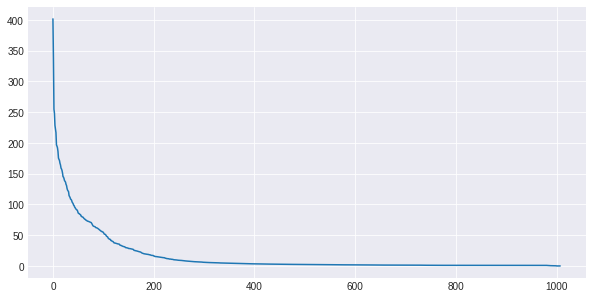

In [192]:
#Set train
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,5))
plt.plot(s)

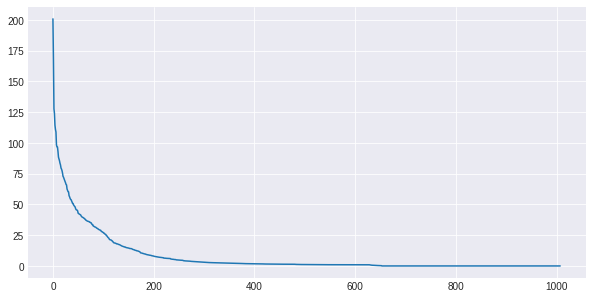

In [193]:
#Set test
plt.figure(figsize = (10,5))
plt.plot(s_test)

**Vemos que a simple vista con 200 dimensiones captariamos la mayor parte de la información. Veamos eso ahora en niveles de energía**

In [194]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print("Energía total:", energy_total)

Energía total: 1703849.9974750003


**Veo ahora la energía acumulada(set de train)**

In [195]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 401.6971514649264 9.47%
Number of Singular Values 2: 336.606369425218 16.12%
Number of Singular Values 3: 254.72826477310352 19.93%
Number of Singular Values 4: 248.38929386408805 23.55%
Number of Singular Values 5: 228.53446746212802 26.61%
Number of Singular Values 6: 222.4120713032877 29.52%
Number of Singular Values 7: 216.7735220108204 32.28%
Number of Singular Values 8: 196.7712785616048 34.55%
Number of Singular Values 9: 194.77653737492648 36.78%
Number of Singular Values 10: 192.06392629404 38.94%
Number of Singular Values 11: 186.18079379071233 40.97%
Number of Singular Values 12: 175.27548915039145 42.78%
Number of Singular Values 13: 173.07134025238338 44.54%
Number of Singular Values 14: 171.32868155297382 46.26%
Number of Singular Values 15: 166.83955689439549 47.89%
Number of Singular Values 16: 164.2155530669844 49.47%
Number of Singular Values 17: 159.1511795530377 50.96%
Number of Singular Values 18: 157.67949678782665 52.42%
Number of Sin

**Efectivamente como sospechabamos, con 200 dimensiones puedo capturar el 99% de la energía del set de datos. Probemos reducir a esas dimensiones y veamos qué sucede con nuestro modelo**

In [196]:
#set de train, tomo una representación de los datos en 200 dimensiones
aprox200 = np.matrix(u[:, :200]) * np.diag(s[:200]) 
features_svd = pd.DataFrame(aprox200).add_suffix('_svd')
features_svd.head()

,0_svd,1_svd,2_svd,3_svd,4_svd,5_svd,6_svd,7_svd,8_svd,9_svd,10_svd,11_svd,12_svd,13_svd,14_svd,15_svd,16_svd,17_svd,18_svd,19_svd,20_svd,21_svd,22_svd,23_svd,24_svd,25_svd,26_svd,27_svd,28_svd,29_svd,30_svd,31_svd,32_svd,33_svd,34_svd,35_svd,36_svd,37_svd,38_svd,39_svd,...,160_svd,161_svd,162_svd,163_svd,164_svd,165_svd,166_svd,167_svd,168_svd,169_svd,170_svd,171_svd,172_svd,173_svd,174_svd,175_svd,176_svd,177_svd,178_svd,179_svd,180_svd,181_svd,182_svd,183_svd,184_svd,185_svd,186_svd,187_svd,188_svd,189_svd,190_svd,191_svd,192_svd,193_svd,194_svd,195_svd,196_svd,197_svd,198_svd,199_svd
0,-1.404028,-0.323716,-0.078201,-0.309497,0.237896,0.481921,-0.185231,-0.005790,0.215922,-0.090665,-0.105771,0.101370,-0.146813,0.104307,-0.063931,-0.173363,-0.274304,0.048291,-0.020933,0.186197,-0.145741,-0.050484,-0.110502,0.004554,0.017209,0.153535,0.043275,-0.091938,0.125371,0.022739,0.030994,0.082520,0.008829,0.162157,0.078268,0.007454,-0.026342,-0.192760,-0.172603,-0.098911,...,-0.000230,0.000873,-0.000917,0.000146,0.001193,-0.004075,-0.000955,-0.000064,0.000680,0.000964,0.000199,-0.000703,0.000920,-0.000807,0.000751,0.000503,-0.001183,0.000326,0.000358,0.000214,-0.001678,0.000406,0.000251,-0.000109,-0.000843,0.000737,0.001217,0.000598,-0.000407,-0.000893,0.001186,0.000487,0.000245,-0.000550,0.000203,-0.000125,-0.000347,-0.000788,0.000640,0.000929
1,-0.518961,1.408644,0.022022,0.021325,-0.047974,0.368618,-0.411548,0.681176,-0.044826,0.481764,-0.324891,-0.096044,-0.579211,0.134741,0.059104,-0.232929,1.016572,-0.363950,-0.174001,0.223599,-0.134365,0.094138,-0.291878,-0.295905,0.315054,-0.249364,-0.341246,0.367870,0.149624,-0.032569,0.265837,-0.364319,0.198724,-0.470785,0.126826,0.155751,-0.081965,0.138159,0.006815,-0.000373,...,0.001349,-0.000304,0.004354,-0.005548,-0.000416,-0.021387,-0.004333,-0.000308,-0.004327,-0.002432,-0.001143,0.002932,0.003089,0.000858,-0.000829,0.001478,-0.000395,-0.000703,-0.000254,-0.001876,-0.005135,-0.004133,-0.002217,-0.000250,0.003020,0.000448,-0.001342,-0.000164,0.000164,-0.001417,0.000847,-0.001024,-0.003505,-0.001885,0.001754,0.001395,-0.001375,-0.003667,-0.003685,-0.003177
2,0.561054,0.022378,1.206271,0.624472,0.312766,-0.284193,0.361650,-0.291694,-1.017434,-0.413520,0.037802,-0.664867,0.353705,-0.005912,0.200268,0.445045,0.172333,-0.025080,0.519643,0.167815,0.124816,-0.397206,-0.000210,-0.227795,0.351266,0.064108,0.303180,-0.229455,0.133362,-0.027863,0.133927,0.003768,0.039127,0.033336,-0.231168,0.150370,-0.443975,-0.158134,0.050558,0.071698,...,0.007337,0.003637,0.005172,0.001431,-0.008613,-0.001811,-0.002139,0.011699,-0.001220,-0.005367,-0.004584,0.005604,-0.006200,0.001492,-0.000186,0.005023,-0.001441,0.004040,-0.006690,0.008499,0.009825,-0.002560,-0.001445,-0.002531,0.002602,0.001337,-0.001668,-0.002945,0.000056,-0.000284,-0.009470,0.011307,-0.008860,-0.005379,-0.003183,-0.002968,0.002381,-0.004725,-0.010301,-0.003471
3,0.335098,-0.968134,0.627606,0.979646,-0.308689,-0.713457,1.077996,0.055314,0.655064,-0.321357,-0.225934,0.064749,-0.192314,0.176303,0.133334,-0.140566,0.054083,0.138261,-0.210757,0.239263,0.035265,0.069975,-0.150896,0.220984,-0.251940,-0.056822,-0.112343,0.195304,0.288334,-0.457448,-0.939819,-0.038796,0.070674,-0.017606,0.009806,0.190387,-0.373534,-0.386159,0.120147,-0.359540,...,-0.000512,-0.008331,-0.007928,0.013573,0.070116,-0.006356,0.000902,-0.007312,0.001865,-0.001368,0.034782,0.001792,0.001207,0.002291,-0.002338,-0.050875,0.001288,-0.038923,0.019852,0.001914,0.011633,0.009834,0.000609,-0.002492,0.005295,-0.002671,-0.000503,0.003987,0.003113,0.006661,-0.097781,0.000006,0.002499,-0.001239,-0.007082,0.003470,-0.094163,0.006956,-0.009307,-0.002625
4,-0.951235,-0.511910,-0.374774,-0.571955,0.313827,-0.272784,-0.076193,-0.121232,-0.065391,0.151691,0.033714,-0.358725,-0.284487,0.046396,0.596433,0.578852,-0.078454,0.179654,0.315053,0.438930,0.112967,-0.188553,-0.317801,0.088244,-0.126473,0.259790,0.300792,-0.374079,0.049442,-0.083646,-0.018945,-0.077014,-0.055270,-0.000693,-0.037459,-

## Pruebo el modelo

In [197]:
X = train[Numericos].join(features_svd).join(dummies_palabras).join(targets)
Y = train['precio']
X.head(2)

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,publicaciones_por_año,0_svd,1_svd,2_svd,3_svd,4_svd,5_svd,6_svd,7_svd,8_svd,9_svd,10_svd,11_svd,12_svd,13_svd,14_svd,15_svd,16_svd,17_svd,18_svd,19_svd,20_svd,21_svd,22_svd,23_svd,...,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan,tipodepropiedad_target_metros,ciudad_target_metros,provincia_target_metros,idzona_target_metros,tipodepropiedad_target_publicaciones,ciudad_target_publicaciones,provincia_target_publicaciones,idzona_target_publicaciones
0,8,2,1,2,80,80,23533.0,0.000000,0.000000,0,0,0,0,0,0.728368,51470,-1.404028,-0.323716,-0.078201,-0.309497,0.237896,0.481921,-0.185231,-0.005790,0.215922,-0.090665,-0.105771,0.101370,-0.146813,0.104307,-0.063931,-0.173363,-0.274304,0.048291,-0.020933,0.186197,-0.145741,-0.050484,-0.110502,0.004554,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117.866064,128.276829,157.326433,110.795181,61817.687763,62912.989286,59017.072019,64651.204819
1,10,3,2,2,268,180,24514.0,19.310205,-99.227655,0,0,0,1,1,0.297919,30386,-0.518961,1.408644,0.022022,0.021325,-0.047974,0.368618,-0.411548,0.681176,-0.044826,0.481764,-0.324891,-0.096044,-0.579211,0.134741,0.059104,-0.232929,1.016572,-0.363950,-0.174001,0.223599,-0.134365,0.094138,-0.291878,-0.295905,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187.276312,233.158005,157.326433,197.302326,59753.070115,56328.297113,59017.072019,54434.372093


In [198]:
X = train[Numericos].join(features_svd).join(dummies_palabras).join(targets)
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,publicaciones_por_año,0_svd,1_svd,2_svd,3_svd,4_svd,5_svd,6_svd,7_svd,8_svd,9_svd,10_svd,11_svd,12_svd,13_svd,14_svd,15_svd,16_svd,17_svd,18_svd,19_svd,20_svd,21_svd,22_svd,23_svd,...,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit,titl_polanco,titl_loma,titl_herradura,titl_condesa,titl_bosque,titl_country,titl_hermosa,titl_vista,titl_residencia,titl_condominio,titl_golf,titl_lujo,titl_huixquilucan,titl_terreno,titl_fracc,titl_casa,titl_villa,titl_remate,titl_recamaras,titl_ecatepec,titl_cerca,titl_coacalco,titl_izcalli,titl_planta,titl_lote,titl_bonita,titl_cautitlan,tipodepropiedad_target_metros,ciudad_target_metros,provincia_target_metros,idzona_target_metros,tipodepropiedad_target_publicaciones,ciudad_target_publicaciones,provincia_target_publicaciones,idzona_target_publicaciones
0,8,2,1,2,80,80,23533.0,0.000000,0.000000,0,0,0,0,0,0.728368,51470,-1.404028,-0.323716,-0.078201,-0.309497,0.237896,0.481921,-0.185231,-0.005790,0.215922,-0.090665,-0.105771,0.101370,-0.146813,0.104307,-0.063931,-0.173363,-0.274304,0.048291,-0.020933,0.186197,-0.145741,-0.050484,-0.110502,0.004554,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117.866064,128.276829,157.326433,110.795181,61817.687763,62912.989286,59017.072019,64651.204819
1,10,3,2,2,268,180,24514.0,19.310205,-99.227655,0,0,0,1,1,0.297919,30386,-0.518961,1.408644,0.022022,0.021325,-0.047974,0.368618,-0.411548,0.681176,-0.044826,0.481764,-0.324891,-0.096044,-0.579211,0.134741,0.059104,-0.232929,1.016572,-0.363950,-0.174001,0.223599,-0.134365,0.094138,-0.291878,-0.295905,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187.276312,233.158005,157.326433,197.302326,59753.070115,56328.297113,59017.072019,54434.372093
2,5,3,2,2,144,166,48551.0,0.000000,0.000000,0,0,0,0,0,0.758488,51470,0.561054,0.022378,1.206271,0.624472,0.312766,-0.284193,0.361650,-0.291694,-1.017434,-0.413520,0.037802,-0.664867,0.353705,-0.005912,0.200268,0.445045,0.172333,-0.025080,0.519643,0.167815,0.124816,-0.397206,-0.000210,-0.227795,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,193.103834,109.123581,171.952962,104.657895,60391.646507,65943.460277,69072.906771,60646.947368
3,1,2,1,1,63,67,53666.0,19.301890,-99.688015,0,0,0,1,1,0.037240,23534,0.335098,-0.968134,0.627606,0.979646,-0.308689,-0.713457,1.077996,0.055314,0.655064,-0.321357,-0.225934,0.064749,-0.192314,0.176303,0.133334,-0.140566,0.054083,0.138261,-0.210757,0.239263,0.035265,0.069975,-0.150896,0.220984,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,193.103834,163.220779,179.409571,144.000009,60391.646507,59544.324675,59400.198092,56323.751399
4,10,2,1,1,95,95,47835.0,0.000000,0.000000,0,0,0,0,0,0.886637,94038,-0.951235,-0.511910,-0.374774,-0.571955,0.313827,-0.272784,-0.076193,-0.121232,-0.065391,0.151691,0.033714,-0.358725,-0.284487,0.046396,0.596433,0.578852,-0.078454,0.179654,0.315053,0.438930,0.112967,-0.188553,-0.317801,0.088244,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117.866064,181.446911,171.952962,147.122093,61817.687763,69682.227799,69072.906771,71151.313953


In [199]:
RF_model = RandomForestRegressor(oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score29 = -scores.mean()
RF_mae_score29

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


650498.8334105429

In [200]:
scores

array([-651878.5733329 , -649119.09348818])

## Pruebo con más dimensiones

In [201]:
#set de train, tomo una representación de los datos en 500 dimensiones
aprox500 = np.matrix(u[:, :500]) * np.diag(s[:500]) 
features_svd = pd.DataFrame(aprox500).add_suffix('_svd')
features_svd.head()

,0_svd,1_svd,2_svd,3_svd,4_svd,5_svd,6_svd,7_svd,8_svd,9_svd,10_svd,11_svd,12_svd,13_svd,14_svd,15_svd,16_svd,17_svd,18_svd,19_svd,20_svd,21_svd,22_svd,23_svd,24_svd,25_svd,26_svd,27_svd,28_svd,29_svd,30_svd,31_svd,32_svd,33_svd,34_svd,35_svd,36_svd,37_svd,38_svd,39_svd,...,460_svd,461_svd,462_svd,463_svd,464_svd,465_svd,466_svd,467_svd,468_svd,469_svd,470_svd,471_svd,472_svd,473_svd,474_svd,475_svd,476_svd,477_svd,478_svd,479_svd,480_svd,481_svd,482_svd,483_svd,484_svd,485_svd,486_svd,487_svd,488_svd,489_svd,490_svd,491_svd,492_svd,493_svd,494_svd,495_svd,496_svd,497_svd,498_svd,499_svd
0,-1.404028,-0.323716,-0.078201,-0.309497,0.237896,0.481921,-0.185231,-0.005790,0.215922,-0.090665,-0.105771,0.101370,-0.146813,0.104307,-0.063931,-0.173363,-0.274304,0.048291,-0.020933,0.186197,-0.145741,-0.050484,-0.110502,0.004554,0.017209,0.153535,0.043275,-0.091938,0.125371,0.022739,0.030994,0.082520,0.008829,0.162157,0.078268,0.007454,-0.026342,-0.192760,-0.172603,-0.098911,...,0.000053,-0.000009,2.067049e-05,0.000019,0.000021,-0.000047,-0.000037,-2.917797e-07,-0.000022,0.000027,0.000068,0.000021,-0.000003,-0.000006,-0.000012,-0.000033,-0.000062,-0.000006,0.000037,0.000036,-0.000033,-0.000011,-0.000017,-0.000004,0.000017,-1.126980e-05,-0.000024,0.000022,0.000020,-3.351274e-06,0.000032,-1.047669e-05,0.000011,-0.000032,-0.000003,0.000006,0.000041,-0.000026,0.000010,-0.000005
1,-0.518961,1.408644,0.022022,0.021325,-0.047974,0.368618,-0.411548,0.681176,-0.044826,0.481764,-0.324891,-0.096044,-0.579211,0.134741,0.059104,-0.232929,1.016572,-0.363950,-0.174001,0.223599,-0.134365,0.094138,-0.291878,-0.295905,0.315054,-0.249364,-0.341246,0.367870,0.149624,-0.032569,0.265837,-0.364319,0.198724,-0.470785,0.126826,0.155751,-0.081965,0.138159,0.006815,-0.000373,...,0.000010,-0.000029,-1.167889e-04,0.000017,-0.000034,0.000048,0.000205,-5.533016e-05,-0.000084,-0.000044,-0.000095,-0.000104,0.000079,0.000006,0.000063,-0.000088,-0.000266,-0.000053,0.000183,0.000190,0.000040,-0.000341,-0.000077,-0.000107,-0.000042,1.623722e-04,0.000240,-0.000036,0.000034,-9.461843e-05,-0.000095,-1.832473e-04,-0.000054,-0.000078,-0.000039,0.000053,0.000060,0.000094,-0.000022,-0.000117
2,0.561054,0.022378,1.206271,0.624472,0.312766,-0.284193,0.361650,-0.291694,-1.017434,-0.413520,0.037802,-0.664867,0.353705,-0.005912,0.200268,0.445045,0.172333,-0.025080,0.519643,0.167815,0.124816,-0.397206,-0.000210,-0.227795,0.351266,0.064108,0.303180,-0.229455,0.133362,-0.027863,0.133927,0.003768,0.039127,0.033336,-0.231168,0.150370,-0.443975,-0.158134,0.050558,0.071698,...,0.000072,0.000123,-3.673758e-05,0.000022,-0.000109,0.000115,-0.000036,-3.347798e-05,-0.000085,0.000044,-0.000160,-0.000030,-0.000035,-0.000007,0.000055,0.000014,-0.000031,0.000034,-0.000023,0.000148,0.000033,-0.000032,0.000134,0.000020,0.000177,-9.635392e-05,0.000115,-0.000142,-0.000115,7.180784e-05,-0.000180,-6.604508e-07,0.000079,0.000033,-0.000059,0.000119,-0.000045,0.000213,-0.000100,0.000765
3,0.335098,-0.968134,0.627606,0.979646,-0.308689,-0.713457,1.077996,0.055314,0.655064,-0.321357,-0.225934,0.064749,-0.192314,0.176303,0.133334,-0.140566,0.054083,0.138261,-0.210757,0.239263,0.035265,0.069975,-0.150896,0.220984,-0.251940,-0.056822,-0.112343,0.195304,0.288334,-0.457448,-0.939819,-0.038796,0.070674,-0.017606,0.009806,0.190387,-0.373534,-0.386159,0.120147,-0.359540,...,-0.000077,-0.000186,4.187580e-05,-0.000077,0.000175,-0.000136,-0.000017,-8.452031e-05,-0.000137,0.000027,-0.000014,0.000109,0.000042,-0.000038,0.000117,0.000008,-0.000011,0.000072,-0.000082,0.000088,-0.000204,-0.000028,0.000686,0.000157,-0.000048,7.518142e-07,-0.000104,0.000079,0.000022,-7.410752e-05,0.000116,-2.176817e-05,-0.000026,-0.000027,-0.000613,-0.000162,0.000023,0.000059,-0.000097,0.000031
4,-0.951235,-0.511910,-0.374774,-0.571955,0.313827,-0.272784,-0.076193,-0.121232,-0.065391,0.151691,0.033714,-0.358725,-0.284487,0.046396,0.596433,0.578852,-0.078454,0.179654,0.315053,0.438930,0.112967,-0.188553,-0.317801,0.088244,-0.126473,0.259790,0.30079

In [0]:
X = train[Numericos].join(features_svd).join(dummies_palabras).join(targets)
RF_model=RandomForestRegressor(random_state=42,n_estimators=80, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score30 = -scores.mean()
RF_mae_score30

## Mejor resultado de kaggle hasta el momento

In [0]:
#Devolvió un score de 535662.74505
X = train[Numericos].join(dummies_palabras).join(targets)
X_test = test[Numericos].join(dummies_palabras_test).join(targets_test)

## Pruebo nuevamente generar un rango de precios pero esta vez tomo en cueta más atributos.

In [0]:
train.columns

In [0]:
precios_por_atributos = train.loc[:,[ 'provincia', 'fecha', 'precio']]\
                        .groupby(['provincia', 'fecha'])\
                        .agg({'precio': ['min', 'max']}).reset_index()

In [0]:
precios_por_atributos.columns = ['provincia', 'fecha', 'precio_min_atrib', 'precio_max_atrib']
precios_por_atributos.shape

In [0]:
train = train.merge(precios_por_atributos, on=['provincia', 'fecha'])
test = test.merge(precios_por_atributos, on=['provincia', 'fecha'])

In [0]:
train

In [0]:
train.info()

In [0]:
#Como puede suceder que haya provincias que no aparecian en el set de train tomo el mínimo y el máximo valor visto
#en el set de train para cubrir los mínimos y máximos de las ciudades que no tienen precios registrados o puede suceder que haya 
#casos donde el mínimo y el máximo sea el mismo, para esos casos pongo un rango global más amplio, asignandoles
#como mínimo el mínimo global y lo mismo con el máximo
minimos_test = list(test['precio_min_atrib'])
maximos_test = list(test['precio_max_atrib'])
minimos_train = list(train['precio_min_atrib'])
maximos_train = list(train['precio_max_atrib'])
minimo_global = precios_por_atributos['precio_min_atrib'].min()
maximo_global = precios_por_atributos['precio_max_atrib'].max()
for i in range(len(minimos_test)):
    if (minimos_test[i] == maximos_test[i]):
        minimos_test[i] = minimo_global
        maximos_test[i] = maximo_global
test['precio_min_atrib'] = pd.Series(minimos_test)
test['precio_max_atrib'] = pd.Series(maximos_test)
for i in range(len(minimos_train)):
    if (minimos_train[i] == maximos_train[i]):
        minimos_train[i] = minimo_global
        maximos_train[i] = maximo_global
train['precio_min_atrib'] = pd.Series(minimos_train)
train['precio_max_atrib'] = pd.Series(maximos_train)
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_año', 'precio_min_atrib', 'precio_max_atrib']

In [0]:
train['precio_max_atrib'].isnull().value_counts()

## Pruebo el modelo con los nuevos features

In [0]:
X = train[Numericos].join(dummies_palabras).join(targets)
X_test = test[Numericos].join(dummies_palabras_test).join(targets_test)

In [0]:
X.shape

In [0]:
RF_model = RandomForestRegressor(n_estimators= 60, random_state = 42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score31 = -scores.mean()
RF_mae_score31

##**Pruebo con otro atributo**

Tomo sólo las fechas y en vez de estimar un rango puedo tomar un promedio

In [0]:
train['precio_promedio_por_fecha'] = train[['fecha', 'precio']].groupby('fecha').transform(lambda x: np.mean(x))

In [0]:
train.shape

In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_año', 'precio_promedio_por_fecha']

In [0]:
X = train[Numericos].join(dummies_palabras).join(targets)
X_test = test[Numericos].join(dummies_palabras_test).join(targets_test)

In [0]:
RF_model = RandomForestRegressor(n_estimators= 60, random_state = 42, oob_score = True)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score32 = -scores.mean()
RF_mae_score32

## **Probar target encoder con direcciones o otros campos sin explorar**

## **Pruebo features sobre las direcciones**

In [0]:
train.direccion.value_counts()

In [0]:
train.groupby('direccion').agg({'precio': 'mean'})

In [0]:
train['direccion'].nunique()

### Pruebo con Target Encoder

In [0]:
cat_cols = ['direccion']
target_enc = ce.TargetEncoder(cols = cat_cols)
target_enc.fit(train[cat_cols], train['metroscubiertos'])
loo_encoder_metros = target_enc.transform(train[cat_cols]).add_suffix('_target_metros')
loo_encoder_metros_test = target_enc.transform(test[cat_cols]).add_suffix('_target_metros')

In [0]:
loo_encoder_metros.head()

In [0]:
cat_cols = ['direccion']
target_enc = ce.TargetEncoder(cols = cat_cols)
target_enc.fit(train[cat_cols], train['publicaciones_por_año'])
loo_encoder_publicaciones = target_enc.transform(train[cat_cols]).add_suffix('_target_publicaciones')
loo_encoder_publicaciones_test = target_enc.transform(test[cat_cols]).add_suffix('_target_publicaciones')

In [0]:
loo_encoder_publicaciones.head()

### **Pruebo el nuevo feature**

In [0]:
targets_new = targets.join(loo_encoder_metros).join(loo_encoder_publicaciones)
X = train[Numericos].join(dummies_palabras).join(targets_new)

## Voting Regresor

Utilizo Voting Regressor con XGBoost y Random Forest como estimadores con los mejores hiper parámetros que he encontrado hasta el momento 

**(ver TP2_Modelos_hiperparametros.ipynb)**

In [0]:
from sklearn.ensemble  import RandomForestRegressor,  VotingRegressor
import xgboost as xgb

xgb_model = xgb.XGBRegressor(subsample = 0.9, reg_alpha = 1, n_estimators = 200, min_child_weight = 1,\
                             max_features = 43, max_depth = 9, learning_rate = 0.25, gamma = 0.0, \
                             colsample_bytree = 0.9)
rf_model = RandomForestRegressor(random_state = 14, n_estimators = 200, min_samples_split = 5,\
                                 min_samples_leaf = 2, max_features = 51, max_depth = 40)
vr_model = VotingRegressor(estimators = [('XGBoost', xgb_model), ('RandomForest', rf_model)], weights = [1,1])



In [0]:
scores = cross_val_score(vr_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score33 = -scores.mean()
RF_mae_score33

### Feature sobre la antiguedad y los metroscubiertos



In [0]:
metros_min = train.metroscubiertos.min()
metros_max = train.metroscubiertos.max()
delta_max_metros= (metros_max - metros_min)
def calificar_antiguedad(metros):
    delta =  metros - metros_min
    return delta/delta_max_days

In [0]:
train['puntaje_por_antiguedad'] = train[['antiguedad', 'metroscubiertos']].groupby('antiguedad').transform(lambda x: calificar_antiguedad(x))
test['puntaje_por_antiguedad'] = test[['antiguedad', 'metroscubiertos']].groupby('antiguedad').transform(lambda x: calificar_antiguedad(x))

In [0]:
train['puntaje_por_antiguedad'].head()

In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_año', 'puntaje_por_antiguedad'] 

#### Pruebo el modelo

In [0]:
X = train[Numericos].join(dummies_palabras).join(targets)
X_test = test[Numericos].join(dummies_palabras_test).join(targets_test)
Y = train['precio']

In [0]:
scores = cross_val_score(vr_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score34 = -scores.mean()
RF_mae_score34

### Feature sobre los metroscubiertos



In [0]:
metros_min = train.metroscubiertos.min()
metros_max = train.metroscubiertos.max()
delta_max_metros= (metros_max - metros_min)
def calificar_antiguedad(metros):
    delta =  metros - metros_min
    return delta/delta_max_days

In [0]:
train['puntaje_por_metros'] = train['metroscubiertos'].transform(lambda x: calificar_antiguedad(x))
test['puntaje_por_metros'] = test['metroscubiertos'].transform(lambda x: calificar_antiguedad(x))

In [0]:
train['puntaje_por_metros'].head()

In [0]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_año', 'puntaje_por_metros'] 

#### Pruebo el modelo

In [0]:
X = train[Numericos].join(dummies_palabras).join(targets)
X_test = test[Numericos].join(dummies_palabras_test).join(targets_test)
Y = train['precio']

In [0]:
X.head()

In [0]:
scores = cross_val_score(vr_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score35 = -scores.mean()
RF_mae_score35

## **Pruebo con otro target: metroscubiertos y caracteristicas**

## nuevo feature


In [0]:
train['no_posee'] = (train.iloc[:, [17,18,19,20,21]].sum(axis = 1) == 0)
test['no_posee'] = (test.iloc[:, [17,18,19,20,21]].sum(axis = 1) == 0)
train.head(2)

In [0]:
train.shape

In [0]:
train['no_posee'] = train['no_posee'].transform(lambda x: 1 if x else 0)
test['no_posee'] = test['no_posee'].transform(lambda x: 1 if x else 0)

In [0]:
train['no_posee'].value_counts()

In [0]:
data_con_caracteristicas = train.iloc[:, [0,17,18,19,20,21,30]]
data_con_caracteristicas_test = test.iloc[:, [0,17,18,19,20,21,29]]
data_con_caracteristicas_test.head()


In [0]:
data_con_caracteristicas = data_con_caracteristicas.melt(id_vars = ['id'], value_vars = ['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'no_posee'], var_name = 'caracteristica', value_name = 'si/no')
data_con_caracteristicas_test = data_con_caracteristicas_test.melt(id_vars = ['id'], value_vars = ['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'no_posee'], var_name = 'caracteristica', value_name = 'si/no')
data_con_caracteristicas.head()

In [0]:
data_con_caracteristicas = data_con_caracteristicas.loc[data_con_caracteristicas['si/no']==1]
data_con_caracteristicas_test = data_con_caracteristicas_test.loc[data_con_caracteristicas_test['si/no']==1]
data_con_caracteristicas.head()

In [0]:
data_con_caracteristicas.shape

In [0]:
def concatenar_caracteristicas(group):
  res = ''
  for caracteristica in group:
    res += caracteristica
    res += '-'
  return res

data_con_caracteristicas = data_con_caracteristicas[['id', 'caracteristica']].groupby('id').agg({'caracteristica': concatenar_caracteristicas}).reset_index()
data_con_caracteristicas_test = data_con_caracteristicas_test[['id', 'caracteristica']].groupby('id').agg({'caracteristica': concatenar_caracteristicas}).reset_index()

In [0]:
data_con_caracteristicas.head()

In [0]:
data_con_caracteristicas_test.shape

In [0]:
train = train.merge(data_con_caracteristicas, on = 'id')
test = test.merge(data_con_caracteristicas, on = 'id')

In [0]:
train['metros_por_caracteristica'] = train[['metroscubiertos', 'caracteristica']].groupby('caracteristica').transform(lambda x: np.mean(x))

#### Genero el nuevo target

In [0]:
cat_cols = ['tipodepropiedad','ciudad', 'provincia', 'idzona', 'caracteristica']
target_enc = ce.TargetEncoder(cols = cat_cols)
target_enc.fit(train[cat_cols], train['metroscubiertos'])
target_encoder_metros = target_enc.transform(train[cat_cols]).add_suffix('_target_metros')
target_encoder_metros_test = target_enc.transform(test[cat_cols]).add_suffix('_target_metros')

target_encoder_metros.head(2)

In [0]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','idzona', 'lat', 'lng','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha', 'publicaciones_por_año'] 

#### Pruebo el modelo

In [0]:
targets = target_encoder_metros.join(target_encoder_publicaciones)
targets_test = target_encoder_metros_test.join(target_encoder_publicaciones_test)
X = train[Numericos].join(dummies_palabras).join(targets)
X_test = test[Numericos].join(dummies_palabras_test).join(targets_test)
Y = train['precio']

In [0]:
scores = cross_val_score(vr_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
RF_mae_score36 = -scores.mean()
RF_mae_score36

# Creación del archivo Submit

In [0]:

RF_model = RandomForestRegressor(n_estimators=60,random_state=42, oob_score = True)
submit1 = crear_submit(RF_model,X, Y, X_test, "RF_target_encoderX2")
submit1.head()